In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [2]:
# Load cleaned data
data = pd.read_csv('clean_train.csv', sep=';', decimal=',')

In [3]:
# Split data to separate 'y' and 'X'.
y = data['EXTRA_BAGGAGE']

# Drop target variable from X DataFrame
X = data.drop('EXTRA_BAGGAGE', 1)

In [ ]:
# We'll apply nested cross-validation in order to avoid the possible bias of applying 
# cross-validation combined with grid-search to perform parameter tuning.

# We'll use nested cross-validation over several classification methods in order to
# obtain their generalization score and choose the one with highest score. After this,
# we'll perform a simple cross-validation with grid-search in order to obtain the 
# best configuration of hyper-parameters for this algorithm. Finally we'll train 
# the model with all the training data and the hyper-parameter configuration that
# yield the best results.

# variace: it removes useless variables with variace equal to zero.
# scaler: standardizes each column to have mean equal to zero and variance equal to 1, 
# in order to give same importance to variables with different measurement units.
lr_pipe = Pipeline([('variance', VarianceThreshold()),
                    ('scaler', StandardScaler()),
                    ('lr', LogisticRegression(class_weight='balanced', random_state=621473))])

param_grid = dict()
param_grid['lr__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

inner_cv = StratifiedKFold(n_splits=10, random_state=975428)
outer_cv = StratifiedKFold(n_splits=10, random_state=248733)

gs_cv = GridSearchCV(lr_pipe, param_grid=param_grid, n_jobs=-1, scoring='f1_weighted', cv=inner_cv, verbose=10)

lr_nested_cv_f1_scores = cross_val_score(gs_cv, X, y, cv=outer_cv, verbose=10)

joblib.dump(lr_nested_cv_f1_scores, 'lr_nested_cv_f1_scores.pkl', compress=1)

print("##### Generalization F1 Score: mean =", np.mean(lr_nested_cv_f1_scores), "std =", np.std(lr_nested_cv_f1_scores))
print()

##### Generalization F1 Score: mean = 0.663232566525 std = 0.00577941758843

In [ ]:
linear_svm_pipe = Pipeline([('variance', VarianceThreshold()),
                            ('scaler', StandardScaler()),
                            ('linear_svm', SVC(kernel='linear', random_state=123456, probability=True, class_weight='balanced'))])

param_grid = dict()
param_grid['linear_svm__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

inner_cv = StratifiedKFold(n_splits=10, random_state=975428)
outer_cv = StratifiedKFold(n_splits=10, random_state=248733)

gs_cv = GridSearchCV(linear_svm_pipe, param_grid=param_grid, n_jobs=-1, scoring='f1_weighted', cv=inner_cv, verbose=10)

linear_svm_nested_cv_f1_scores = cross_val_score(gs_cv, X, y, cv=outer_cv, verbose=10)

joblib.dump(linear_svm_nested_cv_f1_scores, 'linear_svm_nested_cv_f1_scores.pkl', compress=1)

print("##### Generalization F1 Score: mean =", np.mean(linear_svm_nested_cv_f1_scores), "std =", np.std(linear_svm_nested_cv_f1_scores))
print()

In [21]:
rf_pipe = Pipeline([('variance', VarianceThreshold()),
                            ('scaler', StandardScaler()),
                            ('rf', RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=573146, class_weight='balanced'))])

param_grid = dict()
param_grid['rf__n_estimators'] = list(range(200, 1200, 150))
param_grid['rf__max_depth'] = [10, 20, 30]
param_grid['rf__min_samples_leaf'] = [50, 60, 70, 80, 90, 100]


inner_cv = StratifiedKFold(n_splits=10, random_state=975428)
outer_cv = StratifiedKFold(n_splits=10, random_state=248733)

gs_cv = GridSearchCV(rf_pipe, param_grid=param_grid, n_jobs=-1, scoring='f1_weighted', cv=inner_cv, verbose=10)

rf_nested_cv_f1_scores = cross_val_score(gs_cv, X, y, cv=outer_cv, verbose=10)

joblib.dump(rf_nested_cv_f1_scores, 'rf_nested_cv_f1_scores.pkl', compress=1)

print("##### Generalization F1 Score: mean =", np.mean(rf_nested_cv_f1_scores), "std =", np.std(rf_nested_cv_f1_scores))
print()

##### Encoded: Generalization F1 Score: mean = 0.687527970451 std = 0.00504951880128

[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__mi

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.5s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6950870947076042, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6875193396417965, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6913275646196038, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6844931605854634, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6880088577579233, total=   8.0s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6758334570146228, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.3s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6794679220132783, total=   8.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6815864561193867, total=   9.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6823775347803858, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.685076693212304, total=  14.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6941812596323917, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.675444702612

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.7s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6821687118364618, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6885726565014654, total=  14.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6862658263816046, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6821726095229529, total=  19.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6949244174884418, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.67585666653

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   55.7s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6856162874029789, total=  19.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.682414416364435, total=  19.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6812101642863921, total=  19.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.688126707220767, total=  19.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6858775153528957, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6825824157886

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.682431942939606, total=  23.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6890167111582762, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6864078769125501, total=  26.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6856590669990777, total=  29.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6829826901697122, total=  29.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.674849845486

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6871902056033661, total=  28.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6898171829442264, total=  28.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6850886847648803, total=  34.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.683363820212872, total=  34.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6944029979546075, total=  34.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.676622549302

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.682572895908944, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6928688482113536, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6848825066175744, total=  42.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6705934688672864, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6938366805166322, total=  40.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.688258730

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.686238190305461, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6856740250108936, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.682217329168146, total=  40.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.684367717941026, total=  12.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6823581768083995, total=  12.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.682040277280

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6884526328392336, total=  13.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6948037809081095, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.681157262543025, total=  18.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6715893489592282, total=  18.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6837395823665153, total=  19.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.687663644678

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.6min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6834758255554355, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.672945933616017, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6823751936676686, total=  24.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.681272624894448, total=  23.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6880961996942545, total=  23.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6852071412785

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6821430940573457, total=  35.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6929083986071131, total=  34.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6729146145812773, total=  34.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6845247445410606, total=  34.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6832919924151034, total=  34.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.68161065402

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6797512201870424, total=   7.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6843693946852408, total=   8.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6845247445410606, total=  39.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6777496653132113, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6796875277200561, total=   7.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.684048452

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6884526328392336, total=  39.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6841928331463106, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6865024775909845, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6838044314427294, total=  18.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6914864610450735, total=  18.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6792034631

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6779242183785337, total=  24.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6840241466440854, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6870924125913243, total=  24.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6844099474301176, total=  28.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6793896823196387, total=  28.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.69191327441

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.1min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6824232556834474, total=  34.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.68748553976299, total=  34.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6848416845287834, total=  35.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6787750115453804, total=  39.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6843996198735286, total=  39.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.68397822441

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6792659151956958, total=  39.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6910506634796558, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6820317311474695, total=  40.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6726040713452789, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6822098198632658, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.678636626

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6805714639789879, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6700253773833714, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6925707091014042, total=  24.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6828916030249836, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6819960240683811, total=  25.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.68229960750

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.0min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6811861788395153, total=  33.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6830754154675868, total=  32.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6800439971959858, total=  33.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6822922008080419, total=  33.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6852811479574842, total=  33.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.67868333591

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 13.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6905175294524597, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6694114357476023, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6831875210941322, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6812900454645036, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6774980902366953, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.67885415773

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 14.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6833829645508112, total=  22.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6792989559855747, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6828471161191749, total=  23.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6777162710280228, total=  23.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6797097022996608, total=  24.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68430516628

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6807859103885918, total=   7.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6797804951209214, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6905801258899393, total=   6.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6702026342157822, total=   6.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6794758504079947, total=   7.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.69036

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6812804329963705, total=  11.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6811421670791867, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6798326927797961, total=  17.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.678402972685685, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6718035923021134, total=  17.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.680864

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.7min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6761556587004384, total=  28.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6840948680674971, total=  28.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6805027061158353, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6796761126459716, total=  33.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6774160014679992, total=  32.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 19.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6748190236204172, total=  38.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6775333961429955, total=  37.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6900994759695456, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6867687998658587, total=  13.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6953548058712951, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.67932

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6864848341698845, total=  27.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6937964101537553, total=  25.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6898254670330383, total=  25.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.689710675440083, total=  32.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.688708210954744, total=  31.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6965718153085

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6850883567566367, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6836815195205455, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6896434287383486, total=  42.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6820051795877742, total=   8.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6879328119657987, total=  42.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.691267525

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6840709202114906, total=  26.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6958127402676233, total=  26.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.679037079428314, total=  25.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6859800149249082, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6847501713302454, total=  26.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.681840249040

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.6min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6955912190841398, total=  43.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6909309629040741, total=   7.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6755115692622207, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6839293603602888, total=   8.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.679037079428314, total=  43.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6807161955

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6889959839729829, total=  19.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6841729869639465, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6809421233799806, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6923139073529515, total=  24.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.674926894269842, total=  24.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.683939525084

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 29.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6754899121559259, total=  43.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6919637340334154, total=   8.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6921071158898451, total=  44.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6721350050793025, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6851603100942739, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.684025367

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 30.3min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6925459848973482, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6717846935107413, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6835688097637069, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6842429658505621, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.679320203524606, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.679687527720

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.4min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.673551472195652, total=  43.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6837737550669178, total=  40.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6787144162034942, total=   7.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6788300368103767, total=   7.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.682465174980532, total=   7.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.68368054349

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6836494334039378, total=  24.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.67752387557975, total=  24.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6831366147050207, total=  26.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6824487777137203, total=  29.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6800039535310579, total=  29.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6913812129426

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6800762674084375, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6791147720711533, total=  40.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6782164580400389, total=  12.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6789094766964119, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6899101097541465, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.66827

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6791270034105812, total=  29.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6828653448923397, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6829335594616791, total=  28.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6802525949709702, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6791942269236093, total=  36.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 39.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6953376504064139, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6911700066662012, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6898816260558545, total=  19.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6877639970612958, total=  19.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6959633440578931, total=  20.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.68154898381

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 42.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6891218045667103, total=  43.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6831078330018345, total=   8.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6898816260558545, total=  46.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6973297440259837, total=  43.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6948453578727805, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.67647426

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6847501713302454, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6863805506201572, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6889386660685557, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6814397962385824, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6837641187966736, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68686711136

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 46.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6831875210941322, total=  40.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6932424444538587, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.674926894269842, total=  13.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6851096786556448, total=  13.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.680055451408289, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.682663876753

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 48.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6851303887566398, total=  36.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6818741852040399, total=  37.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6804091847996747, total=  35.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.686594408559647, total=  35.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.681052348596257, total=  37.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6850846604269

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6835244337619172, total=  19.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6803949971285116, total=  24.0s
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6824584033302112, total=  23.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 50.2min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6925459848973482, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.671980004468277, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6842429658505621, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6835688097637069, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.679320203524606, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6796875277200

[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 52.6min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6791752919048255, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6794679220132783, total=  40.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6917695904280529, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6701739099745491, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6807469989026931, total=  12.6s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.684339855008466, total=  12.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6814270752024247, total=  33.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6791557387674005, total=  34.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6785234421434416, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 55.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6837149013422377, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6783450954461616, total=  36.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6828653448923397, total=  34.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6826537018923396, total=  39.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6825718360740298, total=   7.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.68000395

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6905801258899393, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6802264234758008, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6803052490865, total=  23.2s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6694637997290486, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6787269123923899, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6826692411442318, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.683918183731272, total=  22.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6765686001190754, total=  25.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6816286361329253, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.678793

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.9min finished


[CV] ....................... , score=0.6880663190687802, total=59.1min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 59.1min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.679860907841196, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_es

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.8s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6858782860825291, total=   7.9s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6796639855978777, total=   8.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6750558182778369, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6867899371524427, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6828056700104609, total=   8.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.69087880672

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.4s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6866991552225441, total=   8.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6809319393264335, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6848101884606439, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6903107426872808, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6748264053361795, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.68756213862

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.6s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6866342350829971, total=  14.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6792556533904338, total=  14.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6835290175615051, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6843996198735286, total=  18.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6823482678737138, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.68896567507

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6773017313493065, total=  19.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.679504510824976, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6866852466509874, total=  20.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6843785053193502, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6814093408201003, total=  24.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.687994779015

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6777091382915386, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6847119129596028, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6856162874029789, total=  25.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6832194377122238, total=  29.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6806178277561581, total=  29.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.68918430048

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6864167551626149, total=  30.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6847247203595332, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6830039363324579, total=  35.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6817818670264155, total=  35.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6893906031056078, total=  34.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.67255575845

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6803949971285116, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6839993657452769, total=  38.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6809907325951963, total=  39.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6913442102454811, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6741468665403155, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.68998537

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6828572742506784, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6847369348327731, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6785401820252501, total=  39.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6759647319943968, total=  40.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.686221023760436, total=  39.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.683198857

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6872889924271391, total=  12.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6808381873889078, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6905921868460116, total=  18.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6817818670264155, total=  19.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6808724649759225, total=  18.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.67295605703

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.6min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6816727848129734, total=  24.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6856614885550774, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6791252467748847, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6746002322456308, total=  24.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6822690762528627, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.68511849442

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6818533329185497, total=  36.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6886250452781771, total=  34.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6714216441472245, total=  33.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6806840623451933, total=  33.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6846987116875898, total=  34.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.67952558957

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6704255891755079, total=  39.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6887958193770609, total=  40.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6751524045641693, total=   7.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6749674545751104, total=   8.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6838775553337276, total=   7.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.684080694

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6838697358183393, total=  40.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6840658546277631, total=  12.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6854627470660287, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.683629713215685, total=  17.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6805810438831191, total=  17.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.68844204846

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6749790771487654, total=  23.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6769688865050667, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6840737443241264, total=  23.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6849152242972956, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6814905461851742, total=  29.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.68041324696

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.1min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6759706094397518, total=  34.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6837213253369648, total=  33.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6842538306680637, total=  34.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6820582248845024, total=  38.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6805904700263067, total=  38.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.679541699

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6796037083197145, total=  12.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.676167709614862, total=  40.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6694383279158366, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6903737625272492, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6794598411245201, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6842538306

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.679247338233088, total=  22.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6884645071284715, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6692338441435423, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6825533970104057, total=  23.3s
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6786909789028434, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.676587844337

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.0min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6785164789211872, total=  33.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6811955105984464, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6764017466289685, total=  33.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6747977186091499, total=  33.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6849399341034433, total=  33.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68467786532

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 13.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6780792320722915, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.688407215987898, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6663096357051423, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6780551131036856, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6829233473052285, total=  11.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.68486619445

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6801807695020202, total=  22.9s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6810764703809886, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6738736805025165, total=  22.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6740027144689908, total=  23.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6814607160238677, total=  22.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68473090162

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6797121842519918, total=   6.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6802991345586251, total=  40.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6803466816599378, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6880415883705467, total=  37.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6684421955410025, total=  38.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.68729

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.2min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.684433001900289, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6845085603206684, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6793537714637644, total=  17.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6782253372647608, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6663096357051423, total=  17.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.677301

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.7min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6708413348228032, total=  27.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6811065118500025, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6854776028023901, total=  27.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6791806784548274, total=  35.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6780551131036856, total=  34.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 19.0min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.676428766057557, total=  37.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6726234497099822, total=  37.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6892750364492937, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6867687998658587, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6937804487013727, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.682488

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6939665706131722, total=  25.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6806684166873858, total=  26.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6870401599742425, total=  25.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6853845267947706, total=  31.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6840369874510416, total=  31.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.69477529773

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6863415046279431, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.686278696170378, total=   8.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.679904879955738, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.689297833266903, total=  42.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6800799826498409, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6860165212827

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.683629713215685, total=  25.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6743620831660666, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6907495975267031, total=  25.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6849650145480788, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6801209021425222, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.684308940394

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.5min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.69016735308135, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6912927344765444, total=  41.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6800306721867864, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6744377593496076, total=   7.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6739908893690327, total=  41.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.68334406473

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.686594408559647, total=  19.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6830634174600769, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.680208622255352, total=  23.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6729660226451544, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6886015329921464, total=  26.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6810605410439

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6875821577059036, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6891963395580427, total=  41.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6725947236129289, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6798680869046475, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6826967987459236, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.673366309

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 30.1min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6784298250182399, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6875821577059036, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6706559915673908, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6786984695534323, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6764199145810552, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.67982620623

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.2min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6806916577390648, total=   8.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6694637997290486, total=  42.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6782831906335028, total=  39.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6752621165679921, total=   7.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6746002322456308, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.685989400

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.6min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6839245292944559, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6838536454090878, total=  23.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6811337747002164, total=  29.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6784552931992682, total=  29.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6880184899234919, total=  29.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.67045169128

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6809211155498823, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6756783313792322, total=  12.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6766155448959595, total=  39.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6748027078077172, total=  39.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6690467908269818, total=  12.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.67731

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.4min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.682330375496744, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6736254848069915, total=  28.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6824959885127144, total=  29.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6799656008913704, total=  33.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6753011221202259, total=  33.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.68

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 39.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6949495342010821, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6882077633763185, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6863361171022871, total=  19.7s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6842429658505621, total=  19.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6935583078869603, total=  19.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.67960820531

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.8min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6852383677268931, total=  43.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6834534699756483, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6933939447907429, total=  43.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6787828148525133, total=  42.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6916667693393823, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.67412622

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6845743278389004, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6793096575913475, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6779055734495008, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6863896687015194, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6848737042598074, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68430894039

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6911248857228527, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6807667625383382, total=  15.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6746780545006579, total=  13.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6815957673334139, total=  14.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6779528148696506, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6870558325

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.9min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6826277269290487, total=  34.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6845549518842367, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6777979859515988, total=  36.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6849152242972956, total=  34.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6850375711357115, total=  36.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.67676481907

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6847052864829983, total=  20.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.681312623056479, total=  25.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6784298250182399, total=  24.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6875821577059036, total=  24.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6706559915673908, total=  25.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6786984695534323, total=  24.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6764199145810552, total=  24.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.67578998208

[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6807656868891421, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6776024822629982, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6761899944423644, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 52.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6791942269236093, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6705934688672864, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6885895472786718, total=  13.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6792556533904338, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.681742770498224, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.68465401592

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6812046891650878, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6774249027803446, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6740122632555123, total=  34.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6832734244870754, total=  34.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6839245292944559, total=  36.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6838347841200487, total=   6.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6817380187587783, total=  40.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.67943468

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.684339855008466, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6661132565771384, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6792125453258914, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.675939703352623, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6750145113092775, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6756540325301892, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6832811835739201, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.68154223964245, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6805459407767986, total=  28.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6753011

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.6min finished


[CV] ....................... , score=0.6869955563308229, total=58.8min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 117.9min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6799467145548752, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s


[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6827986033605217, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6800477191732426, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6863988481530229, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6868671113669956, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6826525932393438, total=   9.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6804279898832695, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6795070150172272, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6756734567235975, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.690282797048867, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.683214884124

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.2s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6794490862941258, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6794516075603535, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.686184885218503, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.681782059544329, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6787450126070211, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6889285869395

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.5s


[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6831780954992757, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6872520649503675, total=  18.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6812284207163732, total=  24.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6768168206616362, total=  27.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6888974438767831, total=  24.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_sampl

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6798760054012434, total=  23.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6856162874029789, total=  24.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.678200436340359, total=  29.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6831776626002098, total=  30.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6882915266815532, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.675879243222

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.686007631701207, total=  28.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6866780699672664, total=  29.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6842046789978653, total=  35.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.679401928177296, total=  36.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6879017723942557, total=  34.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6756845940028

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6762455793489077, total=   8.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6790014308983171, total=  39.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6836094653690654, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6875118934402169, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6738659834470618, total=   8.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.68710100

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6868170206934154, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6869983645125365, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6838044314427294, total=  12.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6747000812558313, total=  12.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6810508397667348, total=  40.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.67950604

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6878160034793505, total=  12.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6764963251390067, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6841837043779567, total=  19.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6886702387073544, total=  18.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6750672137106085, total=  18.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.68415464090

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6858098846409605, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6812567450826008, total=  24.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6793236327043788, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6884368819837015, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6852071412785204, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10, score=0.67553259668

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6814335293158972, total=  35.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6886919229221679, total=  34.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6744944459628867, total=  40.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6845450354120761, total=  35.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.685627266690687, total=  35.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.685784610837

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6835186866154045, total=   7.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6838192581956538, total=   8.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6851303887566398, total=  41.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6802613319714759, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6778907073683549, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6857751869

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  7.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6842110174711798, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6850774470807647, total=  12.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6833724115189882, total=  17.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6880750910579864, total=  18.2s
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6742433875081464, total=  18.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.67682870579

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6788872467149847, total=  23.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6825125573906848, total=  23.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6855891317996726, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.685681299072605, total=  25.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6762906773325922, total=  28.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.682788069552

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.2min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6802761603944916, total=  33.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6857154396006676, total=  34.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.685811975557511, total=  36.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6764963251390067, total=  39.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6820288515494775, total=  40.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6816286361

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6764629956031489, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6716346404264186, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6868954969261831, total=  12.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6849250938500187, total=  12.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6792949398776819, total=  41.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6855916579

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.7min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6763122809975389, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6825125573906848, total=  23.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6835590910737742, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6732481205871887, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6775589067738086, total=  23.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.68045588263

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.0min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6815957673334139, total=  32.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6817222993783544, total=  33.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6787269123923899, total=  34.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6861659102994838, total=  34.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6803052490865, total=  35.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68448084572724

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 13.1min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.6789165828677693, total=  38.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6880859540588672, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6722978664712591, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6815575672981499, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.683636527359091, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.67947172467

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 14.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6815273035675867, total=  22.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6794081432121862, total=  23.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6779465208597535, total=  22.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6781599386234504, total=  23.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6814525338552327, total=  22.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68450185523

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6805594023856035, total=   7.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6802622102911635, total=  40.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.674166881803128, total=   7.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6877068485252789, total=  39.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6723087223209471, total=  38.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.690956

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6828810334584101, total=  11.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6860592089993437, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6807540007396623, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6737258852585235, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6712575735027045, total=  17.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.68348

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.685091724692292, total=  27.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6755461222574657, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.682448861993706, total=  30.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.679812356485704, total=  33.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6741262215956298, total=  33.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6884

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 19.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.676949043363679, total=  37.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6761430002690586, total=  37.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6833323792330341, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6876733613794448, total=  14.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6917194031244891, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.683036

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.4min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6841140072903537, total=  25.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6939418078843007, total=  25.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6907877059656519, total=  25.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6874910597062799, total=  31.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6822054091301493, total=  31.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.69334716799

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6882245630213002, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.689402557987665, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6884189796668507, total=  42.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6808333067154374, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6832237011637664, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.69146223733

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.6min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6790600595806361, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6929589983029225, total=  24.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6878911304409387, total=  24.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6782244190277165, total=  26.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6869994830011092, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.68045588263

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6943298155726804, total=  41.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6897790388372271, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.677605756596163, total=  43.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6776754724228344, total=   8.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6880529084050976, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6841243952

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6867317599517746, total=  20.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6822239325361326, total=  23.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6770804319443452, total=  26.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6758566665383967, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6898264920488079, total=  25.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.68668994171

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 29.0min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6756390960309744, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6894143601517716, total=   7.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6919759681545338, total=  42.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6756507079358124, total=  40.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6857154571900222, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.684092771

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 30.3min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.678041769393708, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6894375071014238, total=  24.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6742549700172771, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6823482678737138, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6825332846748581, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.677718806288

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6759666225436871, total=   7.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6815169072771086, total=   7.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6782925902742583, total=   7.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6849650145480788, total=   7.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6837543299347043, total=  40.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6798517928

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6851603100942739, total=  23.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6862476822206084, total=  23.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6788795323033113, total=  25.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6808576895473767, total=  28.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6747108575269021, total=  29.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.68887592522

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6785089326415132, total=  39.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6818337384499226, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6806684166873858, total=  38.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6741468665403155, total=  12.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6884533539655532, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.68193

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6779334787780539, total=  28.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6848737042598074, total=  30.1s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.684760005339149, total=  30.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6812383902887338, total=  33.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6759225043846154, total=  35.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.67

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 39.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6939164390854884, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.690191708764453, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6861073155419678, total=  20.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6929083986071131, total=  20.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6799338451085953, total=  20.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.683357844357

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 42.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6875371275026614, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6788310062556848, total=   8.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6833948705212756, total=  44.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6801276468280553, total=  42.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6949243995832339, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.679001430

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6867932184721515, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6802499630304303, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6876962757064231, total=  25.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6834014992393969, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6864816013028466, total=  24.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.69047759356

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 46.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6802029227352542, total=  41.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6752502767110418, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6907743139340704, total=  13.3s
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6872520172841864, total=  12.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6840709202114906, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.691050663

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 48.2min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6843089403941205, total=  36.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6855307315554235, total=  37.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6802613319714759, total=  36.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6821915203018641, total=  37.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6867615291147734, total=  37.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.68806762084

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.687070909862907, total=  19.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.678041769393708, total=  25.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 50.3min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6851896740735214, total=  26.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6742549700172771, total=  25.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6892429686463983, total=  26.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6823482678737138, total=  26.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6827283319639378, total=  25.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.68589199985

[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6808563737727648, total=  40.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6801035172226835, total=  12.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 52.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6763015577788793, total=  13.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6791147720711533, total=  42.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6884305904272031, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6744139717446224, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6836923818052234, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6785299213

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6825019626673666, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6821226486873122, total=  34.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6785502872627437, total=  35.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 55.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6853749006108828, total=  35.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6804723050573969, total=  35.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6868671113669956, total=  36.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6815872672924173, total=   7.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6814627276492692, total=  41.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.67605113

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6711289675199174, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6873169070896908, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6801994916463693, total=  24.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.68052125145148, total=  23.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 57.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6785089326415132, total=  24.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6779198301118814, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6838695892476938, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6851405148562568, total=  25.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6808480154085594, total=  28.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67611

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 59.2min finished


[CV] ....................... , score=0.6910708094548781, total=59.6min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 177.5min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6851463270924908, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.1s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6846987116875898, total=   8.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6763635454699013, total=   8.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.685216053523161, total=   8.4s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6822690762528627, total=   8.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6829034371907321, total=   8.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.680444442756

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.1s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6861158196649395, total=   8.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6865639248971523, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6779345762261394, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6820883707352712, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.686721533556678, total=  14.0s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6779400755541503, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500,

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.0s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6853653131318803, total=  14.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6790486479259735, total=  14.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6863361171022871, total=  19.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6761484214141467, total=  19.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6809171026006806, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.68865916876

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   56.3s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6869752341527346, total=  19.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6848500048141696, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6855686017028231, total=  24.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6751821520756643, total=  24.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6880750910579864, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.68171731049

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6779334787780539, total=  24.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6842538306680637, total=  24.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6874403643732523, total=  24.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6767539102366511, total=  29.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6855686017028231, total=  30.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.68610534518

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6864438350420969, total=  29.2s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6844498143440922, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6846151711384184, total=  34.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6767539102366511, total=  35.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6817242043871908, total=  35.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.68532544315

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6745572513692352, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6802989753090812, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6765282396182665, total=  40.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6840398105875145, total=  40.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6833829645508112, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.68132410

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6837036808823642, total=   7.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6862851000949861, total=   7.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6788985801503508, total=  40.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6767873645093824, total=  40.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6840198939656358, total=  12.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.675522161

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6751322667588715, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6824863633915562, total=  18.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6824731046500243, total=  18.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6866681180559548, total=  20.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6825917828707536, total=  18.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.68173261200

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.6min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6805904700263067, total=  24.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.675809877932067, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6765587442882436, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6819208260111127, total=  24.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6845085603206684, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10, score=0.682077041220

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6814993546258182, total=  34.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6863107860479307, total=  34.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6826363327962125, total=  34.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.680962028710062, total=  33.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6777395349070068, total=  34.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.675414493449

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.68368133368943, total=   7.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.684687960516022, total=   7.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6820486715236289, total=  39.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.681157262543025, total=  40.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.673661436920761, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.68490867628728

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  7.0min


[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6858777585240157, total=  12.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6824731046500243, total=  12.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6734137186078007, total=  17.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6820085012469607, total=  18.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6811274585015377, total=  18.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_sampl

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6750235993270967, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6826847887716018, total=  23.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6768166665203446, total=  24.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6843118011740187, total=  23.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6812673765010971, total=  28.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.67224827289

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.2min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6754098901195218, total=  33.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6820883707352712, total=  34.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6836947349048215, total=  33.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.682972123796509, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6808857905542105, total=  39.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6726132620

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.9min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.676196982155085, total=  38.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.675405136250862, total=  38.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6799061599498143, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6816648351569166, total=  12.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6847093095248827, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.67502359932

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.7min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6718729055362742, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6814687464701242, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6851603100942739, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6802436125965537, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6825229979962703, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.67559259642

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.0min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6804643254214932, total=  33.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6833236966141866, total=  33.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6756283424732838, total=  33.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6750051425801914, total=  33.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6811274585015377, total=  35.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68351808016

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 13.1min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6782985033606189, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.683053274891136, total=  11.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6853456825303196, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6821915203018641, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.677154214991776, total=  12.4s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6838073982460653, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, 

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 14.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6818185126142177, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6811165514094494, total=  23.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6712337815158514, total=  23.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6823364546411445, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6750146317518801, total=  24.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68090282796

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6804478248322691, total=   8.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6694637997290486, total=   8.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6736272835126007, total=  42.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.680306277249877, total=  41.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.684564715964277, total=  42.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6800799

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6817618973245324, total=  13.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.680523918545785, total=  14.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6778983771210176, total=  18.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6718307602684668, total=  18.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6798988488701689, total=  19.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.680668

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 18.0min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6817173104938449, total=  28.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6722276720159692, total=  28.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6815591801956421, total=  29.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.677328770473215, total=  33.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6724441002417748, total=  33.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.68

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 19.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6742141751798405, total=  37.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.67182770578292, total=  36.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6877539302382759, total=  14.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6809795169227809, total=  14.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6892871634784092, total=  14.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.689620448

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.7min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6893640520012178, total=  26.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6893289362485572, total=  26.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6832408803867075, total=  31.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6871589361480201, total=  32.3s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6790134711131305, total=  31.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.68788033652

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6853749006108828, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6885895472786718, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6891843004868989, total=  42.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6896875666182567, total=  42.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6809216007604383, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.680291521

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6879810334767703, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6843883264469024, total=  25.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.686711155178693, total=  24.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6867006246292559, total=  24.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.686689941719095, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6787269123923

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6861659102994838, total=  42.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.684806896067177, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6865565067580676, total=   7.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6875118934402169, total=  41.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6835783758587207, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6850774659

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 27.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6874072698291458, total=  18.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6860210345991656, total=  24.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6788985801503508, total=  24.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6844243693842449, total=  24.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6863314171529908, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.68482459212

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 29.2min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.685216053523161, total=  41.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6873271897037669, total=  40.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6826189691862573, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6859800580153906, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6812313075631962, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6828807132

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 30.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6749962293076996, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6826189691862573, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6867517575440217, total=  23.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6824404783156695, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6829129198656021, total=  24.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.67562834247

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.6min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6803566530327751, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6777694592770492, total=   7.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6818359200163795, total=  40.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6846770558189824, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6740122632555123, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.683861765

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6813322756635396, total=  24.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.683053274891136, total=  23.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6841214248621551, total=  24.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6807253126901629, total=  28.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6748099726478934, total=  28.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.681280432996

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.9min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6792472531033986, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6728088032488037, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6760196918408957, total=  38.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6730099632442503, total=  39.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.679695070957061, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.683792

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.7min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.673831559525286, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6810992281869058, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6807590776333197, total=  29.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6781204231471855, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6741957274094428, total=  33.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.67

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 39.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6904775935658837, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6901362679991211, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6789892330459233, total=  19.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6881206768466692, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6890815667853204, total=  20.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.68937849531

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 42.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6881091821520319, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6784873197336638, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6787950992574476, total=  43.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6884189796668507, total=  42.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6872851477791723, total=  43.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.68657575

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6868954969261831, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6863002420409227, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6787200292917277, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6793608343748553, total=  25.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6876174568020688, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68722812393

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 46.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6789094766964119, total=  41.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6844243693842449, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6885076001957269, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.684806896067177, total=  13.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.679504510824976, total=  13.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.685856100184

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 48.2min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6840064056444906, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.686840208094695, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.679925932372452, total=  35.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6761735076880192, total=  35.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6846457656146238, total=  34.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6858552795155

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6862630963101354, total=  18.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6753964802568281, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 50.1min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6820952465862246, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6826189691862573, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6867517575440217, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6824404783156695, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6829129198656021, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.67562834247

[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6816860769728835, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6745769281666362, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 52.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6772113759268015, total=  40.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6751762769152199, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6822529043731844, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6849933582840896, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6826612409634761, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.68104400

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6821329483377518, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6792796824188211, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6765972331042133, total=  33.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6732027211302645, total=  33.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6840948680674971, total=  34.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6830614159433457, total=  35.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6805294770277277, total=  39.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6741957274094428, total=  40.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.68022282

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6786909789028434, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6853456825303196, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6790985959923443, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6803466816599378, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6752281306811472, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6738233637611368, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6820958574333355, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6825334756250377, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6782894461468342, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67322

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.7min finished


[CV] ........................ , score=0.685332747528375, total=58.8min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 236.3min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6844099474301176, total=   7.6s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.4s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6771441437178958, total=   7.8s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6834999868203795, total=   7.8s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6966908443738364, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6795332616857025, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6788948087983029, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.67928809851

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6845837876941075, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6838044314427294, total=  13.2s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6761780256910317, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6836889327454148, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6779817744905495, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.67654946801

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.1s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6867317599517746, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6841837043779567, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6773289122924787, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6974620544205886, total=  18.0s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6838852246274469, total=  17.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.67840673608

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.3s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6795151279388125, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.686805196532823, total=  19.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6801562583485244, total=  19.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.682281724263668, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6757777513099328, total=  24.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6850780203134

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6803746873057478, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6819084429671226, total=  29.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.676158445704442, total=  29.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6838927438770191, total=  29.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6963349330009471, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.677046456085

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6811644848379906, total=  28.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6849746142248916, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6819170942236997, total=  34.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.676322847183399, total=  35.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6835142947755006, total=  35.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.697106904102

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.686953299290169, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6757063953170931, total=  39.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6813296536663558, total=  40.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6815137530231336, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6947896159744206, total=   7.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.684307450

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6846373647457948, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6872672811927245, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6791557387674005, total=  40.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6771588557896571, total=  40.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6863799098512502, total=  12.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.674400520

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6855055268726353, total=  12.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6750235993270967, total=  18.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6848499211714616, total=  18.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6945676661361966, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6828961195920935, total=  18.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.67856382009

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.677362189520189, total=  23.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.685066421534835, total=  23.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6799154838064718, total=  23.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6752027044770804, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6844414834932644, total=  23.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6833396290068

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6750055084747758, total=  34.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6841109431175291, total=  33.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6950251190096798, total=  34.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6767925749386038, total=  34.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6850774659068312, total=  33.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.67876530023

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6835186866154045, total=   7.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6771807341285857, total=  39.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6776024822629982, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6830102989064315, total=   7.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6749899573618544, total=   7.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samp

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6849152242972956, total=  38.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6820317311474695, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6831114658172659, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6818135292576684, total=  17.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6738404809339066, total=  17.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6814919292

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6805563130597831, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6828572742506784, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6806623827438654, total=  28.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6724441002417748, total=  28.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6819138613736069, total=  28.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.69484535787

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6740027144689908, total=  33.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6830449826989621, total=  34.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6811696920326598, total=  33.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6804764221709035, total=  38.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6722566914868688, total=  38.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.681402946

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6781793975965259, total=  39.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6751925872988492, total=  39.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6803405221959826, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6932828600715509, total=  12.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6826059064091283, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.677387183

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6718886708596906, total=  22.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6797738022288565, total=  22.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6952596221429868, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6746081662874841, total=  23.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.680962028710062, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.677416001467

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6750086485443612, total=  33.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6817326120006458, total=  33.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6781888946129706, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6743925690409646, total=  33.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6826447869700465, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68376213681

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.674995170277392, total=  38.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6813502180235201, total=  11.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6730986047327829, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6749962293076996, total=  11.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6818851868317202, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.69516166533

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6952045638616116, total=  24.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6793509092122761, total=  23.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.673216852162279, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6758240338115127, total=  23.3s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6816567339639302, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.678995650751

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.4min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6776937962557632, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.671080575498432, total=  38.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6740185781400982, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6801437044040919, total=  37.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6950111928111479, total=  38.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.678549

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6804953331158192, total=  11.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6837455351524181, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6780847880888557, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6716437193016205, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6785620434442856, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.69391

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.5min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6739977129968723, total=  28.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6797024624242032, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.681386756710311, total=  27.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6704683070942598, total=  32.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6769286821539011, total=  33.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.67

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6756370607118463, total=  36.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6738190397973958, total=  36.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6874671059232196, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6804210940371569, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6875424943996293, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6987945

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6874907342003241, total=  26.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6899243804979517, total=  26.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6858777585240157, total=  25.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6841399120090895, total=  31.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6806729549404933, total=  31.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.68951373909

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6995967062741111, total=  45.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6864951075360631, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6877068485252789, total=  43.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6809004593264707, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6779267303560073, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.68171697

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6785195049066898, total=  24.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.687038603085294, total=  24.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.696513046545563, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6793394365838088, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6865264910858508, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6813008351616

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6858626408024323, total=  42.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6839073329504415, total=   7.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6961565037505811, total=   7.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6961270807572127, total=  44.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6787320948399167, total=   8.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.683764118

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.5min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6842914495326788, total=  20.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6750146317518801, total=  26.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6838347841200487, total=  27.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6846540159270394, total=  25.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6946517940650659, total=  25.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.67733655986

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6829034371907321, total=  42.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6956193218408179, total=  43.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6846112569927626, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6958127402676233, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6756033078793691, total=   8.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.682973182

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 30.2min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6957986981649331, total=  24.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6840412824577455, total=  26.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6833027143378146, total=  25.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6759915652110662, total=  27.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6785891571818602, total=  25.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.67597633534

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6756507079358124, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6834867717941785, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6829437411755893, total=  40.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6761979499454639, total=  40.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6767438264751405, total=   7.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.674984593

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6808802828808607, total=  23.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6807535659051952, total=  23.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6789374733550214, total=  28.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6718886708596906, total=  29.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6925206522391754, total=  28.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.68229960750

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.7min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6793120745508701, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6692916628932054, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6776024822629982, total=  39.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6716123535371481, total=  38.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6810842076304748, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.68443

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.5min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6802989753090812, total=  28.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6714277395498706, total=  29.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6815697300602223, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6775494916396966, total=  33.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6714563415271299, total=  33.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 39.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6904990014372631, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6878484593521361, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6874910597062799, total=  19.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6802267561837356, total=  19.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6865466532076848, total=  19.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.69897078303

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.8min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.68628987223558, total=  42.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6822407018420051, total=  43.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6759730490292657, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6852418855643024, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6949539569316522, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6881674032

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6793394365838088, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6865366480459191, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6813008351616947, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6804878087251279, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6846288131400887, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68532796689

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6803272764651551, total=  42.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6854205671883963, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6973297440259837, total=  13.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6785121163065709, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6855307315554235, total=  13.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6803365557

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6773494543077279, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6835783758587207, total=  34.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6793608343748553, total=  34.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6761735076880192, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6852663643631863, total=  36.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.68530879225

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6837213253369648, total=  18.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6824771959832333, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6736854201820186, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6840412824577455, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6957986981649331, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.676392070074835, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6833027143378146, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6785891571818602, total=  24.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.676173507688

[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 52.2min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6795944836585767, total=  39.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6759763353464632, total=  39.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6826770903539823, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6755533604748666, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6940162636279981, total=  12.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.684025367

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6758334570146228, total=  34.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6809521531113409, total=  34.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6779934567187069, total=  33.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.6min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6724168934160422, total=  34.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6818844982010384, total=  33.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6817564771935599, total=  34.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6761451960661471, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6779575466050377, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.67286109

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6807135363221866, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6954666839154315, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6736600760106017, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6824912136348635, total=  23.2s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6765878443374135, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.4min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6736027177996275, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6802989753090812, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6811536240932838, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6791416271679493, total=  29.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6710644592945254, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.68069

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.4min finished


[CV] ....................... , score=0.6827476097974181, total=58.5min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 294.8min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6763416087113131, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.684415585763525, total=   7.8s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6806991017479936, total=   7.8s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.679996613848754, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6841714294682423, total=   7.9s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6957112316090915, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.0s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6914344617386576, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6774234841653087, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6843344331016638, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6855983346830881, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6963050693016543, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.68545438644

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.1s


[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6829943580235164, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6847460045585969, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6791956041212164, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6968371387289243, total=  18.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6858545717039669, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_sampl

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.6s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.685811975557511, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6810992281869058, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6894492364836635, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6849405712942375, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6789516916544304, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.684481633920

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6827632857976472, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6858207954744161, total=  24.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6791583231362569, total=  29.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6837618143917629, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.685258354824175, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_sample

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6869946711285361, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6878712400167103, total=  29.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6789516916544304, total=  34.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6828089833080131, total=  34.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6862707251665546, total=  35.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.69628990695

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6835886043930307, total=  40.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6783698367151803, total=  40.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6826692411442318, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6963200779140827, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.686646744259201, total=  39.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.69569611

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.3min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6821031934990998, total=  40.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6878926877509374, total=   7.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6802915219718206, total=  39.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6831512530824859, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6845402416516634, total=  12.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.67921966

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.687295933368903, total=  12.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6843344331016638, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6782244190277165, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6844816339204498, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6742663935349106, total=  18.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.696660098302

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6827632857976472, total=  23.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6742663935349106, total=  24.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6779267303560073, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6783199297018045, total=  23.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6863372549605254, total=  23.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.68521605352

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6840965128302308, total=  34.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6960970436673762, total=  34.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6742433875081464, total=  33.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6781368353679381, total=  34.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.676733230872879, total=  34.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.682569255362

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6789094766964119, total=   7.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6734655733592128, total=  38.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6788072258262395, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6781497180162233, total=   7.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6818689113614935, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6885993958

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6865156549040397, total=  39.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6822690762528627, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6860592089993437, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6831988574887734, total=  18.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.675478846981887, total=  17.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.68149935462

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6802029227352542, total=  23.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6858704146322022, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6785302537383622, total=  23.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6818844982010384, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6831447144230216, total=  28.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.67665751479

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.1min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6795338093182869, total=  33.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6866852466509874, total=  34.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6812880897301996, total=  34.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6831776626002098, total=  39.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6788850745075284, total=   7.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6795588745

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6793304273444893, total=  38.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6834615909232152, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6951023171008687, total=  12.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6710967590789727, total=  12.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6794828093880326, total=  12.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samp

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6824885112378072, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6957410006663547, total=  22.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6699588660976298, total=  23.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6757227751801611, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.680283601869262, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.676776393777

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6763462551248951, total=  33.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.670112169418571, total=  33.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6796201443981523, total=  34.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6769900191627043, total=  34.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6816957263539563, total=  33.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.686678069967

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.676387348871399, total=  38.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.68009520203644, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6958424967713104, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6716579905873541, total=  11.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6788877091237837, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6759461886911

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6704795319312644, total=  22.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6753362857689019, total=  23.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.679513211270766, total=  22.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6794717246769466, total=  23.2s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6862779142456411, total=  22.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.677552756254

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6817927038263433, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6745369464340328, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6764282457039817, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6795270944287723, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6950561860660804, total=  38.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.67635

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6822769353607339, total=  11.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6827646630822165, total=  12.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6784662109461791, total=  17.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6772524328348948, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6939146923926103, total=  17.2s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6795403733153719, total=  17.8s
[CV] rf__min_samples_leaf=100, rf__n_estimat

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6771526976395131, total=  28.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6803134279717132, total=  28.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6835594366014484, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.674926894269842, total=  32.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6778893086420418, total=  33.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.69

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.9min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.677534246302244, total=  37.2s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6777558778050686, total=  37.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.68763653118183, total=  13.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6841460904400564, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6853653131318803, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6999816614

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.2min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6884368819837015, total=  25.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6842198823303368, total=  26.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6879624433801482, total=  25.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6867972829524387, total=  31.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6818704546360889, total=  31.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.68692684039

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6756273255200806, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.680306277249877, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6779693010199312, total=  42.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6851286138704977, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6862784852932182, total=  42.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6896767593

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6797654506783255, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6842455698857083, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6980557747192269, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6761856455616082, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6816957263539563, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.68339487052

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6834451784278774, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6850025030359107, total=  42.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6947314210960016, total=   7.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6734989738635452, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6976391568804351, total=  42.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.678746653

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6835244337619172, total=  18.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6849405712942375, total=  23.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6786129888562535, total=  24.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6816648351569166, total=  24.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6972692942952855, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.67402548515

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6851888633487494, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6974620544205886, total=  40.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6944029979546075, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6826770903539823, total=  41.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6695783937627368, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.679309589

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 29.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6776754724228344, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6844579946330094, total=  23.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6957410006663547, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.670944378742186, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6806729549404933, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.678123346862

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 31.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6717135666544032, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6769016095034903, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6707493389097777, total=  39.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6773366783396421, total=  40.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6784537265092067, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.675552463

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6763331482378204, total=  23.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6832734244870754, total=  24.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.684108444354049, total=  24.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6812284207163732, total=  28.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6757170597439836, total=  29.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.682261065983

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.677916051383746, total=  12.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6778587871897963, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6798832056286472, total=  39.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.680523918545785, total=  12.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6759926055567337, total=  39.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6938228

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6757899820821943, total=  28.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6809028279616516, total=  28.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6835426024587662, total=  28.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.675478846981887, total=  33.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6788758031210393, total=  33.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.69

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 38.8min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6900879697581042, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6900046046767051, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6867842006865231, total=  19.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.68182877229352, total=  19.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6869469767668066, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6995805674352

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.681109479942141, total=  43.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6856087146368403, total=   7.8s
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6788541577339772, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.68834315424742, total=  42.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6840737443241264, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.69898703120

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6765737098746335, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6818994810647304, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6832006527589041, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6806684166873858, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6870037577815531, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68609553388

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6788948087983029, total=  41.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6846112569927626, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6947896159744206, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6742663935349106, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6797097022996608, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6819869763

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.5min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6736368682286964, total=  35.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6794987224312566, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6820462249982638, total=  34.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6799133196212396, total=  34.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.684433001900289, total=  34.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.684108444354

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6862476822206084, total=  18.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6828089833080131, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6776754724228344, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6842619408829542, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6957410006663547, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.670944378742186, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6783268213741988, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6806729549404933, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.676973573141

[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 51.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6809004593264707, total=  39.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6769735731415386, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6814270752024247, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6939736570153304, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6725248762472052, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.679471724

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6719400195620777, total=  33.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.675939703352623, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6794717246769466, total=  33.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.2min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6767873645093824, total=  33.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6832811835739201, total=  34.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6831048057037242, total=  34.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.679812356485704, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6824487777137203, total=  39.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.675500819

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6801306009506167, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6932560693628618, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6713648771011893, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6739761892683548, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.0min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.677388369475192, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6818844982010384, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6761899944423644, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6825619931200709, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6766575147989566, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.679657

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.0min finished


[CV] ....................... , score=0.6909070361370593, total=58.2min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 353.0min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6793000418468532, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.5s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6864340608609721, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6903412607759734, total=   7.7s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.685775186996874, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6854461570724546, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.8s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6806840623451933, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6855125701167515, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6791583231362569, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6860252603448829, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6982010018242003, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.69116079664

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.7s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6864841203069388, total=  18.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6781632765729012, total=  18.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6868169890424328, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6976233734331275, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6744377593496076, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.68663839669

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   53.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6799338919533455, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6860165212827969, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6775935846661412, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6847118382774559, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6856336372766988, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.69725379802

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6781679090613422, total=  24.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6855983346830881, total=  23.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6895595564498611, total=  23.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6784067360828807, total=  29.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6847118382774559, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.68759961835

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6857846108374039, total=  28.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6897550295021236, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.684345682024703, total=  34.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6774115420856227, total=  34.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6968988984334252, total=  34.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.687217222922

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6789768773554412, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.683934096301539, total=  40.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6783822946715314, total=  39.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6907549299715742, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6937947370197745, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.696705986

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6840327901081524, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6895956914211037, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6857230594922179, total=  39.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6785559873573839, total=  40.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.683934096301539, total=  12.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6787828148

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6911790679830085, total=  12.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6839674233537605, total=  18.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6783822946715314, total=  18.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6878219369045154, total=  18.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.673600859162575, total=  18.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.694746200496

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6838927438770191, total=  23.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6730302874026429, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6845964080145535, total=  23.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6783765106401931, total=  23.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6850114965143455, total=  24.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.68979143965

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6852742240797027, total=  34.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6963050693016543, total=  34.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6738192772844742, total=  34.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6852501952842468, total=  33.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6845842681439925, total=  34.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_sampl

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6850702304924471, total=   7.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6732364226682409, total=  39.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6852663643631863, total=  39.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6808896560743836, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6787269123923899, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.683819654

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6834367455760454, total=  39.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6845837876941075, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6868671113669956, total=  11.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6819980951040183, total=  17.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.677263829772448, total=  17.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.68328118357

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6769900191627043, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6860274641444497, total=  23.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6837832389319097, total=  23.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6810026985567792, total=  28.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6766800357037307, total=  29.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.69633493300

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.676797732639844, total=  34.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6832059152218041, total=  34.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.685823214994755, total=  33.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6772524328348948, total=  39.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6808180689519879, total=  39.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.68062304554

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.7min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6780532952844359, total=  12.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.677767869172046, total=  39.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6821440564716085, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6715187335979949, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6931720163002428, total=  12.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.68009970765

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6821242996676595, total=  22.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6949684959706637, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6712803107115044, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6846778653202245, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6795151279388125, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.67717071829

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6719083664532878, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6834999868203795, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6812791006814611, total=  33.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6753846120051897, total=  33.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6854472936548447, total=  33.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68304498269

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.6767819545540069, total=  37.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6818994810647304, total=  11.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6923557898014939, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6840965128302308, total=  11.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6697637315572245, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6810276910

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6707390678338119, total=  22.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6825311217689985, total=  23.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6826638767531554, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6781559325812263, total=  22.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6824808833429004, total=  23.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68429144953

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6792665439618697, total=  37.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6762796394631161, total=  38.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6745265579327357, total=   6.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.682353459635407, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.693706694267913, total=   7.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6815137

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6828321547317425, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.684646905089081, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6811975868475147, total=  17.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6741366228749112, total=  17.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.680537306452826, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6695484

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6820569140595131, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6769900191627043, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6846389335801829, total=  28.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6802329019138214, total=  33.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6741366228749112, total=  32.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6804671664496446, total=  37.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6767926238146185, total=  37.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.68628987223558, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.683058771781727, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6889485945624152, total=  13.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.7030225740

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6818443955122155, total=  26.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6903117643981447, total=  26.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6851237324680629, total=  31.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6836390160182618, total=  31.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6893682989698973, total=  30.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.70192156592

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6891823008909509, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6787950992574476, total=  42.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6831388652367799, total=   7.7s
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6843778721439129, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6901296348664734, total=  42.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.692652474

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.2min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6800086950563159, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6874040087306815, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6984567630662134, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6744834258324641, total=  24.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6869760461548478, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.68266387675

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6984254334505463, total=  41.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6848581747285921, total=   7.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6888268195259993, total=  41.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6960970436673762, total=   7.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6734541217567172, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.686834272

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6872028386763653, total=  19.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6834443992861148, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6790600595806361, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6852501952842468, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6977007531994744, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.68063889063

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6854624658225628, total=  41.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6973590505695103, total=  40.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6851980779481206, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6968836893222516, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6735309470632898, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.686238190

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 29.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.67594319198963, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6959487761999067, total=  22.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6816805831118805, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6733149638902354, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.68368133368943, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.679695070957061

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 31.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6716807001016243, total=   7.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6838927438770191, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6785195049066898, total=   7.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6731306171393945, total=  39.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6794516075603535, total=   7.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6822445912

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6777619489662378, total=  23.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.68111364467266, total=  23.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6848099689000172, total=  23.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6798326927797961, total=  29.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6758902947442591, total=  29.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6821174144404

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.2min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6816082602164346, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6811165514094494, total=  39.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6745265579327357, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6791467201608972, total=  39.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6809100407045339, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.69354

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6836581322039276, total=  28.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6810992281869058, total=  29.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6818135292576684, total=  33.8s
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6758902947442591, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.680116894707516, total=  33.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 38.7min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6929953543268194, total=  13.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6903117643981447, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6854771042825998, total=  19.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6832242355855981, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.7020969549044669, total=  19.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.69035461272

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.4min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.683252217235584, total=  43.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6871697800518859, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6795332616857025, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6901688961375005, total=  43.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6903831419692857, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.703317375

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6742887643909261, total=  25.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6875717343713766, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6871618338698984, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6826638767531554, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6798837717746299, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68681961459

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6796875277200561, total=  41.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6840890732479507, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.698633833206033, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6734425107718419, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.686238190305461, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.680489266684

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.5min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.674277658260043, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6856503857543239, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6816225184956639, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6787269123923899, total=  35.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6862032558832961, total=  35.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.685618923018

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6868111754466837, total=  18.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6810719929454138, total=  23.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.4min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.67594319198963, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6816805831118805, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6961418689131713, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6733149638902354, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6809004593264707, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6842699007097

[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6756621614338496, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 51.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6805000834912466, total=  40.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6798988488701689, total=  40.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6809307745567441, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6939880128647012, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6734307402043543, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.683036539

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6727406540475883, total=  33.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6824885112378072, total=  34.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.68052125145148, total=  33.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.2min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6779707908629635, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6862065295083871, total=  34.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6809100407045339, total=  34.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6774583630595166, total=  38.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6800476342559789, total=  39.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.68024282

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6798988488701689, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6929931525617112, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6684334420725044, total=  22.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6780027274743415, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.0min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6779589577579601, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6813241091067221, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6808954641951982, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6828874299405091, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6806430222886468, total=  28.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67471

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.0min finished


[CV] ....................... , score=0.6809000587820906, total=58.0min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 411.0min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6725248762472052, total=   7.7s
[CV]  rf__min_samples_leaf=50, rf__n_

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6977306317822407, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.68283560717519, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.691009490791422, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.682819209585518, total=  13.1s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6747108575269021, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6830849340568834, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6859705645283086, total=  13.1s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6834069009670863, total=  13.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6835492196019798, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6847003661371165, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6826241542835682, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6739517769507768, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6832962506714726, total=  17.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.69807122993

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.5s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6710967590789727, total=  18.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6843412665990366, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6884602857947598, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6840198939656358, total=  24.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6743520817059017, total=  24.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.68229960750

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.686007631701207, total=  24.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6890717352474153, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6745769281666362, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6834245977784393, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6834615909232152, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.698055774719

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6844066508558337, total=  28.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6890790042970192, total=  29.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6832092243385393, total=  34.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6751322667588715, total=  35.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6984411750319458, total=  34.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.68386176590

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6741569527854335, total=   8.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.682839201888037, total=  39.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6753375935522763, total=  40.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6846540159270394, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6972692942952855, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.682873264

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6830694060356011, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6849019797101472, total=   7.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6817012109969187, total=  39.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6845038418434868, total=  40.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6845732746864254, total=  12.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.674772207

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.7min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6861090241871457, total=  12.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.68357794350659, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6749575499530369, total=  18.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6856250376047234, total=  18.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6964979710504007, total=  18.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6711076547179

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6711393850765672, total=  23.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6847146198269211, total=  23.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6829233473052285, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6801711775929967, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6830772453472308, total=  23.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.68671247188

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6732181326597794, total=  34.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6968683264731599, total=  33.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6850375711357115, total=  34.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6711183907992112, total=  34.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6854932869459961, total=  33.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.67977089120

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6856896352580938, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6964673586510345, total=  39.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6721031330428384, total=  39.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.68492496663094, total=  39.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6811059873480242, total=   7.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6826770903

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6871060076519095, total=  38.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.682465174980532, total=  12.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6863123601019401, total=  12.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6840198939656358, total=  18.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6747818836247409, total=  17.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.68090282796

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.682888651740343, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6863123601019401, total=  23.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6817527750608733, total=  23.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6832194377122238, total=  29.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6736183553999388, total=  28.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_sample

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.0min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6830849340568834, total=  34.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6874994128081826, total=  34.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.682263072554673, total=  39.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6730225131160565, total=  39.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6816385931885596, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6731808098

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6787454126889166, total=  38.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6829437411755893, total=  38.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6838453741567929, total=  12.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6963200779140827, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6711496436649026, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.683724680

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6818844982010384, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6949094166726201, total=  23.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.670964590715198, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6815471187631846, total=  23.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.682034686991289, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6701437567926537, total=  32.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6821564803428021, total=  33.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6818630284925956, total=  33.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6819578720532747, total=  33.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6820807332273903, total=  34.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.68292112628

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6828490524637832, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6961121390773273, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6817439860581052, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6786820169068035, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6676418146008479, total=  12.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.68176262587

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6697833806662945, total=  22.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6807273674833464, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6798083827337692, total=  22.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6783450954461616, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6820807332273903, total=  23.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.68315938532

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6714479023808367, total=  38.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6769613657549991, total=   6.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6716687868498361, total=   7.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6811274585015377, total=  38.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6949684959706637, total=  37.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.67973

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6813308613598076, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6829566413273366, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6796761126459716, total=  17.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6706804302131504, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6812880897301996, total=  17.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.69244

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.5min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6789894197507494, total=  28.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6819067464501278, total=  27.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6839367747688969, total=  27.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6790805325685915, total=  33.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6710883993252021, total=  33.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.8min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6763829574284345, total=  36.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6803566530327751, total=  36.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6839564684438413, total=  14.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6804328466234868, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.689719081939194, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.70153702

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.1min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6890490422007816, total=  25.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6922407791198508, total=  25.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6810158823975152, total=  31.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6853181668825187, total=  31.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6873271897037669, total=  30.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.69784749020

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6718752808163556, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6845180381199205, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6886309855621688, total=  41.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6748498454862712, total=  42.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6834758255554355, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.680683998

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.685775186996874, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6980557747192269, total=  24.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6742549700172771, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6866549422219186, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6801312666522215, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.685998591418

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.2min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.698248488886501, total=  42.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6852071412785204, total=  42.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6821031934990998, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.698101680582499, total=   7.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6726760732975848, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.68590791945

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6845338948082449, total=  19.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6740362565697703, total=  24.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.682819209585518, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6856162874029789, total=  24.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6970917817903943, total=  24.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.671529297443

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6840412824577455, total=  41.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6972998258164499, total=  41.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6794987224312566, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6972846368231482, total=   7.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6801372279386779, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.672881868

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 29.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6747914028389677, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.682823478423607, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6979087389027016, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.670728637596022, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6815407455168987, total=  24.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6769688865050

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 31.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6682464203090303, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6807135363221866, total=   7.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.670944378742186, total=  40.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6807532251751319, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6804892666842636, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6781982369

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6793802207398225, total=  23.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6826923365752862, total=  23.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6841338109716034, total=  24.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6801035172226835, total=  29.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6718395022893293, total=  28.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.68288103345

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.2min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6812578679930853, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6712686269313108, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6803761329831607, total=  38.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.677388369475192, total=  39.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.684415585763525, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6946243

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6781982369007271, total=  28.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6836963817508517, total=  28.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6831366147050207, total=  29.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6724691066868871, total=  33.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6802809794542453, total=  34.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 38.7min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6908560273282868, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6902174188372016, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6845514064458479, total=  19.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6800206192176547, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6887130008325033, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.70019028091

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6859469721602783, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6788985801503508, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6802267561837356, total=  43.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6865662088832855, total=  43.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6854205671883963, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.69924319

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.0min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6862465485302855, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6805316029893274, total=  24.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6742433875081464, total=  25.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6817326120006458, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6896608241924679, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68599859141

[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.681742770498224, total=  41.5s


[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.3min


[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.684815819643343, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.697847490200636, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6715187335979949, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6833505305280805, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6775644228522024, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.5min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6699384333483015, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.682740968837815, total=  35.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6795560435225253, total=  35.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6815169072771086, total=  35.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6842285958978807, total=  35.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.686109024187

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6882858328749926, total=  18.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6806718323343038, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6747914028389677, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.4min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.682823478423607, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6979087389027016, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.670728637596022, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6815407455168987, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6793509092122761, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6775644228522

[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 51.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6793706048210142, total=  39.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6803365557695119, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6840412824577455, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6965279685134698, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.667079122645615, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6811341398

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6693831180974054, total=  33.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6787765398558148, total=  32.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6779744508264905, total=  34.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.2min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6807859103885918, total=  34.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6834850793421653, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6843246248269946, total=  33.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6812482059848496, total=   7.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6797121842519918, total=  39.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.67144790

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6946517940650659, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6826447869700465, total=  23.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.667586781609554, total=  23.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6793680287292302, total=  22.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 55.9min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6767832258793578, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6791848365848981, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6833275089570575, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6821031934990998, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6814531484316549, total=  28.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67225

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.0min finished


[CV] ....................... , score=0.6803104793534267, total=58.1min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 469.1min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6847680125282918, total=   7.7s
[CV] rf__min_samples_leaf=50, rf__n_e

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s


[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6850290303822969, total=   7.9s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6853353369861459, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6880203061654181, total=   7.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6837708859418861, total=   7.9s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6767163559668923, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.9s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6740616068325687, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6759942831802426, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6860716863095958, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6856336372766988, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6836494334039378, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.69847219776

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.0s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6898171829442264, total=  13.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6773343080853309, total=  18.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6851122041971038, total=  18.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6852501952842468, total=  18.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.697121873087907, total=  18.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.675670386035

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.5s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.684466024539571, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6892373010409045, total=  18.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6827632857976472, total=  19.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6769787698770735, total=  24.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.68452892281763, total=  24.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.69807122993953

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6830416074454279, total=  24.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6892452302618869, total=  23.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.67776838340428, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6845402416516634, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6978784212181057, total=  29.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6756622864798, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6890643186645093, total=  29.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.685924434991984, total=  34.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6769339784427568, total=  34.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6877951962663149, total=  34.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.696913954013798

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.676474034748412, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6845624173933027, total=  39.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6779290442996683, total=  39.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6873857083617995, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6964042823823013, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.686834272

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6735457900888929, total=   7.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6855121365307714, total=   7.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6810952683925908, total=  39.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6839523877143887, total=  40.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6833724115189882, total=  12.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.678050815

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6876820546482091, total=  12.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6837395823665153, total=  18.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6773109955563741, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6969816150275411, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6864167551626149, total=  18.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.67551156926

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6757275669440542, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6824808833429004, total=  24.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6808563138578301, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6806154001406383, total=  23.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6863123601019401, total=  23.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.67351873462

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6781234187124042, total=  34.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6864424886708594, total=  33.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6971740032224816, total=  34.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6739716472320405, total=  33.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6816957263539563, total=  34.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.68122204367

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6751218187870479, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6815407455168987, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.68228464348632, total=  38.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6747623756268334, total=  39.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6809917955347197, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.68062722361

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6876960665315788, total=  39.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.673722298777818, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.688867960495641, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6837726992414672, total=  17.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.67552702349892, total=  18.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.69625912024333

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6783034034326897, total=  23.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6806617561017558, total=  23.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6727520528737567, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6868745061375229, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6763945373084942, total=  27.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.68279860336

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.1min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.68748553976299, total=  33.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6739188342126501, total=  34.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6821933330279977, total=  34.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6812383902887338, total=  39.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.675079042949746, total=   7.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6783331930476

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6814397962385824, total=  39.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6819991381675978, total=  38.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6830614159433457, total=  12.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6976233734331275, total=  12.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.683303559036548, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6707791991

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.674278745025977, total=  22.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6826692411442318, total=  23.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6972998258164499, total=  23.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6723606208622317, total=  22.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6829244902285968, total=  23.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.679071314589

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.671384430941852, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6831279135924941, total=  33.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6788985801503508, total=  32.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.681610654029751, total=  33.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6725423665475287, total=  33.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6859056470674

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.673429346635392, total=  11.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6812804329963705, total=  12.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6951173851533464, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6815471187631846, total=  12.0s
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.669343134843121, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6796082053129

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6735309470632898, total=  22.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6805437748175952, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6769074827418446, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.67752387557975, total=  23.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6859311646913654, total=  22.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6721487805025

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.5min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6775653428980558, total=   6.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6713606959352715, total=   6.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.695562504696071, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6807135363221866, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6816882302327355, total=   7.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.696497

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6735115860136643, total=  11.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6858849535389848, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6794522259971804, total=  17.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6740833559954916, total=  17.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6803272764651551, total=  17.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.69435

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6751425575041196, total=  28.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6843308139382004, total=  27.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6717487180016299, total=  27.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6782802346448225, total=  33.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.672536226717863, total=  33.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.68

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.9min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6792770849822239, total=  37.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6767019269096416, total=  37.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6896990876956044, total=  13.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6814229105722973, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6896658008027833, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.67254

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.2min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6853094102069998, total=  26.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6787554340122754, total=  25.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.691747194888933, total=  26.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.687102425561641, total=  31.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6802594286735312, total=  31.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6889079760309

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6772969190601378, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6863988481530229, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6813423133072078, total=  42.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6874040087306815, total=  42.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6823581768083995, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.683370342

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.686152668342062, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6889183569893597, total=  24.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6991631590363179, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.675809613058115, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6852418855643024, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6845719729945

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6879998750928925, total=  41.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6976702621174109, total=  41.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6972381478046797, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6856162874029789, total=   7.8s
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6752502767110418, total=   7.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.681084207

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6878856863189913, total=  18.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6838147020296327, total=  24.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6768053678501206, total=  24.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6859985914180554, total=  24.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.698248488886501, total=  24.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.675467623798

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6860252603448829, total=  40.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6959777588030492, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6833540189599381, total=   7.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6981315195384976, total=  41.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6726760732975848, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.681934305

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 29.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6741017070392441, total=  23.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6849933582840896, total=  24.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6971658621433597, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6748948217981108, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6813029498074675, total=  24.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.67968848790

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6699065871149917, total=   7.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6830772453472308, total=   7.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6791557387674005, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6738993429943072, total=  40.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6823501184505832, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6713355006

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6806388906351596, total=  23.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6729290384954713, total=  23.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6882563856593549, total=  24.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6804764221709035, total=  29.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6738785960640924, total=  29.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.68423715835

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6801209177205405, total=  12.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6730876585845318, total=  12.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6759533007264013, total=  38.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.682034686991289, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6816228102031285, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.694030

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.2min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6787352360739303, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6715518770285505, total=  28.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6886715701705137, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6726875210797394, total=  33.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6795164685197275, total=  34.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 38.8min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6803365557695119, total=  13.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6915422642894472, total=  13.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6810725825093454, total=  19.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6886922471769796, total=  20.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6908780106505332, total=  20.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.70026577931

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6872013987712905, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6802469395959102, total=  42.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6797131469542175, total=   7.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.700926967896886, total=  42.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6895240246302924, total=  43.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.686789937

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6764282457039817, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6854461570724546, total=  25.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6817012109969187, total=  25.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6843778721439129, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6785796719776248, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.69123834868

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6843402627604169, total=  41.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.684433001900289, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6980557747192269, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6748498454862712, total=  13.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6799563482776502, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.68265308963

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6741262215956298, total=  35.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6828810334584101, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.679320203524606, total=  35.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6826295607709587, total=  35.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6764626263034154, total=  35.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.688678848575

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6882563856593549, total=  18.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6798990083190238, total=  23.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6741017070392441, total=  23.6s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6849933582840896, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6971658621433597, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6748948217981108, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6813029498074675, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.67968848790

[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6795250319108025, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6742692625565454, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 51.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.679493738039258, total=  40.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6828584699816832, total=  39.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6844414834932644, total=  12.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6958127402676233, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6822922008080419, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6715080105

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.670923530898781, total=  34.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6814843529157566, total=  34.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.675768027347093, total=  33.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.3min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.682217329168146, total=  34.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.672915023669036, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6880676208441828, total=  34.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.6803499302979126, total=   7.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6735149042597973, total=  39.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6802991345

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6808563737727648, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6946786145356206, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6693533697798132, total=  23.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6779548245020258, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6817242043871908, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6773593414558469, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6731324871573541, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6861023531207753, total=  23.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6789119648497481, total=  28.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67289

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.2min finished


[CV] ....................... , score=0.6967363257012091, total=58.3min
[CV]  ................................................................
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 527.4min remaining:    0.0s


[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6740940701276626, total=   7.8s
[CV]  rf__min_samples_leaf=50, rf__n_

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.7s


[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.684849343921453, total=   8.0s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6854461570724546, total=   7.9s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.6822407018420051, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.0s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=200, rf__max_depth=10, score=0.677767869172046, total=   8.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.677400470560557, total=  13.3s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6824290669660291, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6852501952842468, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.694817792734408, total=  13.3s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6839895772052782, total=  13.3s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.2s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6771588557896571, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=10, score=0.6748382049100632, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6822438091443429, total=  18.5s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6768361583906498, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.683303559036548, total=  18.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.695576938445

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.8s


[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6854093873619815, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6825504055262562, total=  19.1s
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6834187759387768, total=  18.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10 .
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=10, score=0.6862547569629428, total=  19.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6826341567179729, total=  23.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.67624085843

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6852663643631863, total=  23.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.6844140822332627, total=  23.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=10, score=0.677964949698135, total=  24.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6764557266445819, total=  29.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6832092243385393, total=  30.1s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.684693015411

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6844816339204498, total=  29.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=10, score=0.6783401499944557, total=  29.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6836094653690654, total=  34.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6762408584354829, total=  34.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.6849040464198127, total=  34.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=10, score=0.69524608622

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.674697367204208, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6832194377122238, total=  40.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6760457284930768, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6829176223335915, total=   7.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6953548058712951, total=   7.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.683703680

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6832574543462612, total=   7.1s
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=10, score=0.6792796824188211, total=   7.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6818630284925956, total=  40.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=10, score=0.6834069009670863, total=  40.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6816580464387939, total=  12.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.675645537

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.8min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=10, score=0.6816805831118805, total=  12.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.682290821194759, total=  18.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6756254048846461, total=  18.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6834926081097749, total=  18.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.6951322990722381, total=  18.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=500, rf__max_depth=10, score=0.673130617139

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6738883818025929, total=  23.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6805681483971185, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6836131027465451, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6831885368433144, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.6775333961429955, total=  24.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=10, score=0.68309247234

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.4min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6758603133114421, total=  35.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6836576344418438, total=  33.9s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6938228527245669, total=  34.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6731306171393945, total=  34.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.6819653851056116, total=  34.1s
[CV] rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=10, score=0.68206883478

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.3min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6718035923021134, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6947608259724267, total=  39.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6743105016592431, total=  39.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.6809319393264335, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6823595185836279, total=  39.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=10, score=0.68000869

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  6.9min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=10, score=0.6765494680125749, total=  39.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6815137530231336, total=  12.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=10, score=0.6761430002690586, total=  12.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6804856473448742, total=  18.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6768843584608465, total=  18.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=10, score=0.6805500930

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.7min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6809004593264707, total=  23.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6811981284400602, total=  23.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6767588048055055, total=  23.3s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=10, score=0.6817502805244321, total=  23.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.6818337384499226, total=  28.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=10, score=0.67547919191

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.1min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6816225184956639, total=  34.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6765846688924164, total=  33.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=10, score=0.6821242996676595, total=  34.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6794988820794224, total=  39.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10, score=0.6831988574887734, total=   7.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.674510758

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  9.8min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6805107450160991, total=  38.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=10, score=0.6818049118511703, total=  38.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6809240138262534, total=  12.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6939880128647012, total=  12.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.6719296273677082, total=  12.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=10, score=0.680306277

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 10.6min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6746694231676554, total=  22.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.680116894707516, total=  23.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6942096453546726, total=  23.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6787590597262635, total=  23.3s
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.6711496436649026, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=10, score=0.678498204315

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 11.8min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6699786622136602, total=  32.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6785679489506381, total=  33.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6783450954461616, total=  33.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6804444427564413, total=  33.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.6755977242214276, total=  33.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=950, rf__max_depth=10, score=0.67954037331

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 12.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=10, score=0.6808333067154374, total=  38.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6803204276514202, total=  12.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6945383959259055, total=  12.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6697637315572245, total=  11.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6773736058682983, total=  12.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=10, score=0.6802613319

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 13.8min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6711890922242607, total=  23.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6779874114233326, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.676949043363679, total=  23.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.67752387557975, total=  23.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.6762144577290586, total=  23.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=10 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=10, score=0.67976806861852

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.5min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6754976196834104, total=  38.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6738879335941167, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.6791708997168903, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=10, score=0.692882184513186, total=  38.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.6821174144404273, total=   7.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=10, score=0.692094

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 16.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6769557682527535, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=10, score=0.6811532837902006, total=  11.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6806718323343038, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.673114799975802, total=  17.4s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.6789434931635819, total=  17.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=10, score=0.690349

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 17.6min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6743977158030111, total=  27.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=10, score=0.6787820662213708, total=  27.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6734784471022078, total=  32.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6778893086420418, total=  33.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.6793435635770851, total=  33.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=10, score=0.

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 18.9min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6781599386234504, total=  37.0s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=10, score=0.6757967312059564, total=  37.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6883598615370873, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6807650666556353, total=  13.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6875324455493419, total=  13.3s
[CV] rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=20, score=0.6979924

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 20.2min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6937524772718761, total=  25.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=20, score=0.6814607160238677, total=  25.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6861744255763421, total=  31.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6811202198484578, total=  31.4s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.6875424943996293, total=  31.8s
[CV] rf__min_samples_leaf=50, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=800, rf__max_depth=20, score=0.69768558432

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 22.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6750206795780859, total=   7.7s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6866212520464559, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=20, score=0.6797139401708454, total=  42.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6848263170516824, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6805169986540983, total=   7.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=20, score=0.6829821564

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed: 23.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6772657114226427, total=  24.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6996751012280382, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6862032558832961, total=  25.4s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6738659834470618, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.6840737443241264, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=20, score=0.68402536741

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed: 25.3min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6854205671883963, total=  41.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=20, score=0.6994669447160122, total=  41.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6830449826989621, total=   7.4s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6944848867466462, total=   7.6s
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.6744494142615006, total=   7.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20 .
[CV] rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=200, rf__max_depth=20, score=0.685128368

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed: 26.4min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=20, score=0.6862628157823017, total=  18.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6834635899127788, total=  24.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6755326113950759, total=  24.5s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6832962506714726, total=  23.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.6973590505695103, total=  24.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=650, rf__max_depth=20, score=0.67230872232

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 28.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6967358109771833, total=  40.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.684202001137654, total=   7.3s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=20, score=0.6822996075036427, total=  41.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6951470590639801, total=   7.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6703490341546529, total=   7.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=20, score=0.6802142791

[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed: 29.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6778893086420418, total=  24.0s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6818844982010384, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6949684959706637, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6727302872154991, total=  24.1s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.6799874896132498, total=  24.5s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=20, score=0.68051074501

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 32.0min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6817173104938449, total=   7.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6690293155390513, total=   7.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6727197619943459, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.6810508397667348, total=   7.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=20, score=0.6813623741174529, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=200, rf__max_depth=20, score=0.679826288

[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed: 33.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.674402711138354, total=  24.2s
[CV] rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6769590428720452, total=  24.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=650, rf__max_depth=20, score=0.6819471851968993, total=  24.0s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6805294770277277, total=  29.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.6766702262232048, total=  28.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=20 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=800, rf__max_depth=20, score=0.693836680516

[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 35.3min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6783414815997895, total=  12.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6744927414699732, total=  12.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6795151279388125, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=20, score=0.6783349061500348, total=  38.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.6773090254899142, total=  12.0s
[CV] rf__min_samples_leaf=100, rf__n_estimators=500, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=350, rf__max_depth=20, score=0.69086

[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed: 37.2min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6827473180643285, total=  28.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=20, score=0.6757791286511684, total=  28.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6741017070392441, total=  33.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6795498049669938, total=  33.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.6785620434442856, total=  33.7s
[CV] rf__min_samples_leaf=100, rf__n_estimators=1100, rf__max_depth=20 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=20, score=0.

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 38.8min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6934966778095427, total=  13.2s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=350, rf__max_depth=30, score=0.6796875277200561, total=  13.7s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6875592446110426, total=  19.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6809706851841132, total=  19.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.6867615291147734, total=  19.6s
[CV] rf__min_samples_leaf=50, rf__n_estimators=650, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=500, rf__max_depth=30, score=0.68084805949

[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed: 41.5min


[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6869750010213004, total=  43.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6807427792196582, total=  42.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6763327775815247, total=   7.6s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30, score=0.6860745439167538, total=   7.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6883530265150427, total=  42.8s
[CV] rf__min_samples_leaf=60, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=50, rf__n_estimators=1100, rf__max_depth=30, score=0.6982945

[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 43.1min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6742663935349106, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6844739042426519, total=  25.0s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6846202227094077, total=  25.5s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6809373849669739, total=  25.2s
[CV] rf__min_samples_leaf=60, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.6830064036881074, total=  25.3s
[CV] rf__min_samples_leaf=60, rf__n_estimators=950, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=60, rf__n_estimators=650, rf__max_depth=30, score=0.68880934818

[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 45.5min


[CV]  rf__min_samples_leaf=60, rf__n_estimators=1100, rf__max_depth=30, score=0.6833948705212756, total=  41.6s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.68368133368943, total=  12.7s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6954258744380507, total=  12.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6738545458869971, total=  12.8s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.6851283686834505, total=  13.2s
[CV] rf__min_samples_leaf=70, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=350, rf__max_depth=30, score=0.679730930315

[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed: 47.6min


[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6717135666544032, total=  35.0s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6835712988479552, total=  35.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6809216007604383, total=  34.9s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6834187759387768, total=  36.1s
[CV] rf__min_samples_leaf=70, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.6785620434442856, total=  35.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=200, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=70, rf__n_estimators=950, rf__max_depth=30, score=0.68568208426

[CV]  rf__min_samples_leaf=80, rf__n_estimators=500, rf__max_depth=30, score=0.6835411177184257, total=  18.2s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.682281724263668, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed: 49.5min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6774982508814165, total=  23.8s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6818844982010384, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6949684959706637, total=  24.4s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6727302872154991, total=  23.9s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.6799874896132498, total=  23.7s
[CV] rf__min_samples_leaf=80, rf__n_estimators=800, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=650, rf__max_depth=30, score=0.68051074501

[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6761111969418954, total=  12.3s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6817127327576009, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30 .


[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 51.9min


[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6791355659978255, total=  39.4s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=80, rf__n_estimators=1100, rf__max_depth=30, score=0.6814397962385824, total=  39.9s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6793095894980362, total=  12.6s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6949684959706637, total=  12.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.6721245399100991, total=  12.5s
[CV] rf__min_samples_leaf=90, rf__n_estimators=500, rf__max_depth=30 .
[CV]  rf__min_samples_leaf=90, rf__n_estimators=350, rf__max_depth=30, score=0.680537306

[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6703789306645836, total=  33.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6791765690714364, total=  33.7s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6789198542156479, total=  34.8s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed: 54.4min


[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.677154214991776, total=  34.1s
[CV] rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6763647755351444, total=  34.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=950, rf__max_depth=30, score=0.6841179341733383, total=  34.3s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6805459407767986, total=  39.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=90, rf__n_estimators=1100, rf__max_depth=30, score=0.6766796387972842, total=  39.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=200, rf__max_depth=30, score=0.680325219

[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6791201288816507, total=  22.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6905555462348436, total=  22.9s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6708167962188223, total=  23.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6764109081671654, total=  23.2s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 


[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 56.1min


[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6797499680198716, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6773289122924787, total=  23.5s
[CV] rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6761735076880192, total=  23.6s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=650, rf__max_depth=30, score=0.6819534010203382, total=  23.8s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.6793616528205964, total=  28.1s
[CV] rf__min_samples_leaf=100, rf__n_estimators=950, rf__max_depth=30 
[CV]  rf__min_samples_leaf=100, rf__n_estimators=800, rf__max_depth=30, score=0.67387

[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 58.1min finished


[CV] ....................... , score=0.6922127623556666, total=58.2min
##### Generalization F1 Score: mean = 0.687527970451 std = 0.00504951880128



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 585.6min finished


In [12]:
# Function to plot boxplot of nested cross-validation scores.
def plot_cv_scores(cv_scores):
    print(cv_scores)
    print()
    
    sns.set_style("whitegrid")
    
    ax = sns.boxplot(x=cv_scores, orient="v")
    
    plt.show()

[ 0.65955281  0.66496946  0.65845868  0.66442867  0.65624142  0.66287029
  0.66266614  0.65689413  0.67110565  0.67513841]



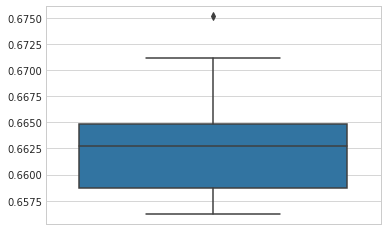

In [13]:
lr_nested_cv_f1_scores = joblib.load('lr_nested_cv_f1_scores.pkl')

plot_cv_scores(lr_nested_cv_f1_scores)

In [14]:
def plot_variable_ranking(model, model_type, column_names):
    if model_type == "rf":
        importance = model.feature_importances_
        importance = pd.DataFrame(importance, index=column_names, columns=["Importance"])
        importance["Std"] = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        
        x = range(importance.shape[0])
        y = importance.ix[:, 0]        
        yerr = importance.ix[:, 1]
        
        plt.bar(x, y, yerr=yerr, align="center")
        plt.xticks(range(len(column_names)), column_names)
        plt.show()
    elif model_type == "lr":
        importance = model.coef_
        importance = pd.DataFrame(importance, index=column_names, columns=["Importance"])
        
        x = range(importance.shape[0])
        y = importance.ix[:, 0]        
        
        plt.bar(x, y, align="center")
        plt.xticks(range(len(column_names)), column_names)
        plt.show()

In [15]:
pca_lr_pipe = Pipeline([('variance', VarianceThreshold()),
                    ('scaler', StandardScaler()),
                    ('pca', PCA(random_state=554197)),
                    ('lr', LogisticRegression(class_weight='balanced', random_state=621473))])

param_grid = dict()
param_grid['lr__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid['pca__n_components'] = list(range(2, 14, 2))

inner_cv = StratifiedKFold(n_splits=10, random_state=975428)
outer_cv = StratifiedKFold(n_splits=10, random_state=248733)

gs_cv = GridSearchCV(pca_lr_pipe, param_grid=param_grid, n_jobs=-1, scoring='f1_weighted', cv=inner_cv, verbose=10)

pca_lr_nested_cv_f1_scores = cross_val_score(gs_cv, X, y, cv=outer_cv, verbose=10)

joblib.dump(pca_lr_nested_cv_f1_scores, 'pca_lr_nested_cv_f1_scores.pkl', compress=1)

print("##### Generalization F1 Score: mean =", np.mean(pca_lr_nested_cv_f1_scores), "std =", np.std(pca_lr_nested_cv_f1_scores))
print

##### Generalization F1 Score: mean = 0.660731584574 std = 0.00561434867445

[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_c

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.66750374936852, total=   0.8s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6685796949041574, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s


[CV]  pca__n_components=4, lr__C=0.001, score=0.6402838091784187, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.001, score=0.644956788834904, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6452904196874459, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6358784026486193, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6398892955228245, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6386762050891316, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6640153679404277, total=   0.8s
[CV]  pca__n_co

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6478903727121639, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6358910291980275, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6372472183751655, total=   0.7s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6410652366155195, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6420882194356852, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6412387898145311, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6536734863242419, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6474863268128395, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6606271651632819, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6473585706928499, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6434387336893721, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6434873061300582, total=   1.1s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6534376474950544, total=   1.0s
[CV] 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.9s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6710611153947622, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6452780446123658, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6560028643476468, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6436485705734976, total=   1.1s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6493454091772118, total=   1.4s
[CV]  pca__n_components=10, lr__C=0.001, score=0.651487130089051, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6426753616459757, total=   1.1s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.0s


[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6616891723850032, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6523281901343214, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6516855837878811, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6600724768743462, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6570372564650998, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.657071652212065, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6546743555047586, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pc

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.8s


[CV]  pca__n_components=2, lr__C=0.01, score=0.644767779237654, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6497165819496991, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.651724437933098, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6512857643211476, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6693245528293064, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6708933789980793, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6463210181227942, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.8s


[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6418846179373868, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6584881237499707, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6484805946951578, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6651406434175484, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6407795365337544, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.642287599925224, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.2s


[CV]  pca__n_components=8, lr__C=0.01, score=0.658159634254066, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6489712822683593, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6568749173207514, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6450889402856467, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.01, score=0.653074699942534, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.662168422352572, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6601895000355632, total=   0.9s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=1

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.8s


[CV]  pca__n_components=12, lr__C=0.01, score=0.6601338113583685, total=   0.6s
[CV]  pca__n_components=10, lr__C=0.01, score=0.657631035434698, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6530248535411234, total=   0.6s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6633384702216283, total=   0.9s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6607368746210178, total=   1.0s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6645288574559896, total=   0.6s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.656241266027067, total=   0.6s
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   11.0s


[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6521171536325109, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6447613358160793, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6497089947672674, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6514734565196282, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6691151971644079, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6706692995192061, total=   0.6s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.3s


[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6417730700675718, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6392629849604625, total=   0.7s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6518770197106766, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6432804534580095, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6440911434763325, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.1, score=0.640668165535875, total=   1.0s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6558373868084182, total=   0.9s
[CV] pca__n_components=8, lr_

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   14.1s


[CV]  pca__n_components=8, lr__C=0.1, score=0.6756284054789671, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6591466090285627, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6665512796932016, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6530335719045807, total=   1.2s
[CV]  pca__n_components=10, lr__C=0.1, score=0.656431144203745, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6564274110069341, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6637840620953321, total=   1.2s
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.8s


[CV]  pca__n_components=2, lr__C=1, score=0.6558131717011122, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.64824206927581, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6456673858267585, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6538573689656502, total=   0.8s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6449580753662768, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6521171536325109, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6497089947672674, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ..........

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   17.3s


[CV]  pca__n_components=4, lr__C=1, score=0.6657258541977391, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6417730700675718, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6430894413576784, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6520759651154471, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6392629849604625, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6408694955766743, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.643481333028101, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.3s


[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6532270776074283, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6673415799692902, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6570138234277363, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6570331849085626, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6639812398828786, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6609895247559032, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ......

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   21.3s


[CV]  pca__n_components=2, lr__C=10, score=0.6456673858267585, total=   0.7s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6449580753662768, total=   0.7s
[CV]  pca__n_components=2, lr__C=10, score=0.6497089947672674, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6514734565196282, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6693068717276078, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6706692995192061, total=   0.6s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.643291705323791, total=   0.7s
[CV] pca__n_components=6, lr__C=10 .

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.2s


[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6558373868084182, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6647931687098615, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.650137998671875, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.650275302708641, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=0.6577397612479058, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6456898920432671, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.6s


[CV]  pca__n_components=12, lr__C=10, score=0.6546105238671684, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.657824509745742, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6664288481404959, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6596690183980252, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6647868953698792, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6590103898051665, total=   0.7s
[CV] pca__n_components=2, lr__C=100 

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.5s


[CV]  pca__n_components=4, lr__C=100, score=0.6484805946951578, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6422810989069068, total=   0.9s
[CV]  pca__n_components=4, lr__C=100, score=0.6586841905406294, total=   0.8s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6657258541977391, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6430894413576784, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6417730700675718, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6392629849604625, total=   0.9s
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.2s


[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6572310716910471, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6607023391649307, total=   0.7s
[CV]  pca__n_components=10, lr__C=100, score=0.6609895247559032, total=   1.0s
[CV]  pca__n_components=10, lr__C=100, score=0.6619084438499344, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6635438533175297, total=   1.1s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=10, lr__C=100

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   32.1s


[CV]  pca__n_components=2, lr__C=1000, score=0.6706692995192061, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6430917275018659, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6467163316027793, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6480788422410133, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.637645503462284, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6396876220155028, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6424915531099341, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.9s


[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6760291115870845, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.659733733443546, total=   1.0s
[CV]  pca__n_components=10, lr__C=1000, score=0.6671465961136537, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6532270776074283, total=   1.0s
[CV]  pca__n_components=10, lr__C=1000, score=0.6568183882428634, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6572310716910471, total=   1.2s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=1

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.5s finished


[CV] ....................... , score=0.6551115422641698, total=  37.0s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.0s remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6537175347543855, total=   0.5s
[CV] pca__n_components=4, lr__C=0.001 ..............................

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6493713149951189, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6669104075579783, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6693811950374, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6382785260769972, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.645581481130575, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s


[CV]  pca__n_components=4, lr__C=0.001, score=0.6456897422499271, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6366782304297316, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6380774705537938, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6412903042684525, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6406918231618067, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6470905231489301, total=   0.9s
[CV]  pca__n_components=4, lr__C=0.001, score=0.664192956961144, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6583149502056481, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6369868560188398, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6411530258797863, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6496900603852476, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6360921731912345, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6366139888683738, total=   0.7s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6508877012074368, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=6, lr__C=0.001, score=0.660246830412504, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.63984098496059, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.653257459692877, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6479818218438528, total=   1.1s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6428591828209217, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.642078748509659, total=   1.0s
[CV] pca__n_compone

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6550799268714215, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6703346843633342, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.648379209107776, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6396576367537593, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6418620868506506, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6492901026759278, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6436622168511885, total=   1.1s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV]  pca__n_components=12, lr__C=0.001, score=0.6491804135443863, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6504869189836598, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6584783024683333, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6532840020313282, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6548470442255088, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12,

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.5s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6451480084340125, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.01, score=0.651724437933098, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6687317532995783, total=   0.5s
[CV]  pca__n_components=2, lr__C=0.01, score=0.649905193335731, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.671647573183643, total=   0.5s
[CV]  pca__n_components=2, lr__C=0.01, score=0.652282018264721, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.5s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6422810989069068, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6598425298705375, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.666126182516065, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6394450043093884, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6455780046115579, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6524737408958041, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6388788465508608, total=   0.9s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.8s


[CV]  pca__n_components=8, lr__C=0.01, score=0.6529503028302261, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6573719695303131, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6480891345146004, total=   1.1s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6489712822683593, total=   1.1s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6462894125921926, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.656876871184988, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6510872300662044, total=   1.0s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.3s


[CV]  pca__n_components=10, lr__C=0.01, score=0.661019786913909, total=   0.9s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6566660903621852, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.649042130237058, total=   0.6s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6570519642424272, total=   1.1s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6589780471007046, total=   0.9s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6643649186053603, total=   0.7s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6726052382412993, total=   1.0s
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.6s


[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.652705951789045, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6689234910377108, total=   0.5s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6501013549794544, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6518736018049098, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6716313990016395, total=   0.5s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.647567153748227, total=   0.7s
[CV] pca__n_components=6, lr__C=0.1 .

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.9s


[CV]  pca__n_components=6, lr__C=0.1, score=0.6453787337303792, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6402487119931282, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6520738257529913, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6390777137730687, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6406523036660634, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6406879916521117, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6434648004932988, total=   0.8s
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.9s


[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.667371989306857, total=   0.9s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6504438962759781, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6554404920218033, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6572267652936171, total=   0.9s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6627923043016378, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.656641218015401, total=   1.3s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=12, lr_

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.5s


[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6511540132168855, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.651935236934299, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6451480084340125, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6566041305949671, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=0.6529021445908252, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6454612180309343, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6520694745641487, total=   0.5s
[CV] pca__n_components=4, lr__C=1 .........

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.9s


[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6520738257529913, total=   0.7s
[CV]  pca__n_components=6, lr__C=1, score=0.6402487119931282, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6455792219324636, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6390777137730687, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6434648004932988, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6522769312331226, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6404505285476466, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.0s


[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=8, lr__C=1, score=0.6756965468875754, total=   1.0s
[CV]  pca__n_components=10, lr__C=1, score=0.6566410647791732, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6667666007620303, total=   1.0s
[CV]  pca__n_components=10, lr__C=1, score=0.6506457639615737, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6558225046718067, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6568267965249983, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   21.0s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6454612180309343, total=   0.7s
[CV]  pca__n_components=2, lr__C=10, score=0.6501013549794544, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6520694745641487, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6689234910377108, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.6716313990016395, total=   0.6s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6480768382776938, total=   0.6s
[CV]  pca__n_components=4, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.9s


[CV]  pca__n_components=6, lr__C=10, score=0.6390777137730687, total=   1.2s
[CV]  pca__n_components=6, lr__C=10, score=0.6522769312331226, total=   0.8s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6633999209045859, total=   0.9s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6406879916521117, total=   1.2s
[CV]  pca__n_components=8, lr__C=10, score=0.6533530809908354, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6484874162318504, total=   1.0s
[CV]  pca__n_components=8, lr__C=10, score=0.6503744655466775, total=   0.8s
[CV] pca__n_components=10, lr__C=10

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.4s


[CV]  pca__n_components=12, lr__C=10, score=0.6577233569509202, total=   0.6s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6576429922336811, total=   0.6s
[CV]  pca__n_components=12, lr__C=10, score=0.666681495212595, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6653726240655073, total=   0.6s
[CV]  pca__n_components=10, lr__C=10, score=0.6733448191406228, total=   1.3s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6583294296601964, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6572352199015629, total=   0.8s
[CV]  pca__n_components=12, l

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.2s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6600292203266053, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6500719391316983, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6663001624808312, total=   0.8s
[CV]  pca__n_components=6, lr__C=100, score=0.6402487119931282, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6455792219324636, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6520738257529913, total=   0.8s
[CV] pca__n_components=8, lr__C=100

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.9s


[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6574331462089608, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6637840620953321, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.656463139390224, total=   0.8s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6568311079473961, total=   1.1s
[CV]  pca__n_components=10, lr__C=100, score=0.6627637971675803, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6589533033256624, total=   1.2s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=12, lr

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.8s


[CV]  pca__n_components=2, lr__C=1000, score=0.6716313990016395, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6408911095427244, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.647567153748227, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6480768382776938, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.637645503462284, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6426916514827978, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6390856806444646, total=   0.8s
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.5s


[CV]  pca__n_components=8, lr__C=1000, score=0.660947099519978, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6667666007620303, total=   0.9s
[CV]  pca__n_components=8, lr__C=1000, score=0.6756965468875754, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6568377337066013, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6558225046718067, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6506457639615737, total=   1.2s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6574331462089608, total=   1.0s
[CV] pca__n_compo

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.2s finished


[CV] ....................... , score=0.6621752521610601, total=  36.6s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6486063023199856, total=   0.5s
[CV] pca__n_components=4, lr__C=0.001 ..............................

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6475803242104952, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6685943604416019, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6491485945847002, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6679203337749853, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6376931446450163, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6447833521246881, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s


[CV]  pca__n_components=4, lr__C=0.001, score=0.6516855837878811, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6350862243080573, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6390856806444646, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6380672401468528, total=   0.9s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6392920619860847, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6565719040767938, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6480892832935383, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_c

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6423384406146476, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6346937597644084, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6359953918824912, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6388670915498431, total=   0.7s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6402235074159169, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6391780875629659, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6494900830872665, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6382914343579856, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6590548326307988, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6436447500937033, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6408721127319555, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6564628780257955, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6522885008643636, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6562740110669832, total=   0.7s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6583564595345318, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.667999833908018, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.648179750553849, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6404921398300057, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6420683666347293, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6432662742662901, total=   0.9s
[CV] pca__n_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.8s


[CV]  pca__n_components=12, lr__C=0.001, score=0.6657344014293501, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6503419369334467, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6494895748484402, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6568831300379235, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.653285190750968, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6530620578852041, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6591076853966203, total=   0.5s
[CV] pca

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.7s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6447613358160793, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6487048682843105, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6512857643211476, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6687665034260468, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6471748601263315, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6706692995192061, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.7s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6492861733432512, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6655509275043565, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.01, score=0.6455734078316985, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6575220884282513, total=   1.1s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6378907441449612, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6550763118902451, total=   1.1s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6396430132430114, total=   0.8s
[CV]  pca__n_componen

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.0s


[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6521660375460954, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6589894629550533, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6488081492390492, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6438859539787408, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6562779256685147, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6498875299976641, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.5s


[CV]  pca__n_components=12, lr__C=0.01, score=0.6558939861026631, total=   0.6s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.661019786913909, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.01, score=0.656056995773788, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6523490635052501, total=   0.7s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6581531937733471, total=   1.0s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6604015529744462, total=   1.1s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6695783937627368, total=   0.7s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_comp

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.9s


[CV]  pca__n_components=2, lr__C=0.1, score=0.6521171536325109, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6487048682843105, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6514734565196282, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6689583889708322, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6710542346212253, total=   0.6s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.6473739619424734, total=   0.6s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.2s


[CV]  pca__n_components=6, lr__C=0.1, score=0.6382920632913365, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6469790616960216, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6564706236732899, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6384828869219826, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6396430132430114, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6396812652081465, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6430587275142152, total=   1.0s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   14.0s


[CV] pca__n_components=10, lr__C=0.1 .................................
[CV]  pca__n_components=8, lr__C=0.1, score=0.6584079264808064, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.1, score=0.6735387427450548, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6552693194785097, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6703980684588193, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6508180072676495, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6558495173122189, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr_

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.6s


[CV]  pca__n_components=12, lr__C=0.1, score=0.6566245956945874, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6579363535388799, total=   0.6s
[CV] pca__n_components=2, lr__C=1 ....................................
[CV]  pca__n_components=12, lr__C=0.1, score=0.6763676689150936, total=   0.6s
[CV] pca__n_components=2, lr__C=1 ....................................
[CV]  pca__n_components=12, lr__C=0.1, score=0.6617372263225635, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6511540132168855, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6447861134707074, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6450845233201216, total=   0.7s
[CV]  pca__n_components=2, lr_

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   17.2s


[CV]  pca__n_components=6, lr__C=1, score=0.6471784132604617, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6566693902556514, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6384828869219826, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6382920632913365, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6430587275142152, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6396430132430114, total=   1.1s
[CV]  pca__n_components=6, lr__C=1, score=0.6430322843164077, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.2s


[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=8, lr__C=1, score=0.6603821603801402, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6504227429019841, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6552693194785097, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6713747331178456, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6566485803074796, total=   1.2s
[CV]  pca__n_components=10, lr__C=1, score=0.6558495173122189, total=   1.3s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   21.2s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6487048682843105, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6689583889708322, total=   0.5s
[CV]  pca__n_components=2, lr__C=10, score=0.6512691743331287, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6710542346212253, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6366679703680569, total=   0.7s
[CV]  pca__n_components=4, lr__C=10, score=0.6396807237035829, total=   0.8s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.3s


[CV]  pca__n_components=6, lr__C=10, score=0.6642042366124825, total=   0.9s
[CV]  pca__n_components=6, lr__C=10, score=0.6430322843164077, total=   1.0s
[CV]  pca__n_components=6, lr__C=10, score=0.6396812652081465, total=   1.0s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6518727384846676, total=   1.0s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6591629032829951, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=0.6424889079764211, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.652961170919367, total=   1.1s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.7s


[CV]  pca__n_components=12, lr__C=10, score=0.6586288200922876, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6661726895190266, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.6562290226939911, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6611420247867804, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.659129594930313, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=4, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6763552663747352, total=   0.7s
[CV] pca__n_components=4, lr__C=100 ..................................
[CV]  pca__n_components=2, lr__C=100

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.4s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.649684874024733, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6661363801351884, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6382920632913365, total=   0.9s
[CV]  pca__n_components=6, lr__C=100, score=0.6471784132604617, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6566693902556514, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6396812652081465, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.0s


[CV]  pca__n_components=10, lr__C=100, score=0.6639812398828786, total=   0.9s
[CV]  pca__n_components=10, lr__C=100, score=0.6566485803074796, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6560452078466348, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6568352609982976, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6573779440958984, total=   1.0s
[CV]  pca__n_components=10, lr__C=100, score=0.6625378482720958, total=   0.9s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6542986527457995, total=   0.7s
[CV]  pca__n_componen

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   32.1s


[CV]  pca__n_components=4, lr__C=1000, score=0.6396807237035829, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.647573024744057, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6366679703680569, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6528757904829979, total=   0.9s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6420919519896868, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.649684874024733, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6394782656256639, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.7s


[CV] pca__n_components=10, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6603821603801402, total=   0.8s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.673732633933127, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6552693194785097, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6504227429019841, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6713747331178456, total=   1.2s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6566485803074796, total=   1.2s
[CV]  pca__n_components=10, lr__C=1000, score=0.6639812398828786, total=   1.1s
[CV]  pca__n_comp

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.5s finished


[CV] ........................ , score=0.655795363190827, total=  37.0s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6486282293839705, total=   0.4s
[CV] pca__n_components=4, lr__C=0.001 ..............................

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s


[CV]  pca__n_components=2, lr__C=0.001, score=0.6496852400036315, total=   0.5s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6501713804486384, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6426301707703096, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.647574261037326, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.643820790851724, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6687219744900728, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6680149894247366, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV]  pca__n_components=4, lr__C=0.001, score=0.645182372637603, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6414919592102163, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6492898121671277, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6394782656256639, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6408911095427244, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.640092428472258, total=   0.9s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6655892152451737, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6336708885837791, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6428918081324497, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6382370217375007, total=   0.7s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6412872330165438, total=   0.7s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6412302545244499, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.001, score=0.63984098496059, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6532776775260892, total=   0.7s


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6602393484229307, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6479784141560844, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6470848389720858, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6548822751687049, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6404894052246114, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6448893982055581, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s


[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6693081301890957, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6605042878216889, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6493651875340226, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6434842399678171, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6548858250376414, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6462877089283047, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.648080686384231, total=   1.0s
[CV] pca__

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV]  pca__n_components=12, lr__C=0.001, score=0.6526804828844399, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6588499998836974, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.655257128322099, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.660872777105366, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6572128952269622, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6716890859541211, total=   0.5s
[CV] pca__n_compone

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s


[CV]  pca__n_components=2, lr__C=0.01, score=0.651724437933098, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6493164866692305, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6703705397290685, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6512519218595257, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6479690787690836, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.668488214898187, total=   0.7s
[CV] pca__n_components=6, lr__C

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6414830776118601, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6616389575496894, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6684751260227532, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.01, score=0.6467818946832596, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.639492472089247, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6492888306469371, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.6s


[CV]  pca__n_components=8, lr__C=0.01, score=0.645063488614546, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6594198803034733, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6539308316092156, total=   1.2s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6470907179685612, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6544395303686241, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6600463355639425, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6526701985288681, total=   1.0s
[CV]  pca__n_component

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.2s


[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6671242728648423, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6603227255555904, total=   0.9s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6586152435722685, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.663093538435853, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6566134631496265, total=   0.8s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6542907567797825, total=   0.8s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6611826738500752, total=   1.1s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.5s


[CV]  pca__n_components=2, lr__C=0.1, score=0.6519665819221073, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6475483601244251, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6586593476620805, total=   0.7s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6514295201146412, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.652509722393343, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6493164866692305, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6686807559746111, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.8s


[CV]  pca__n_components=6, lr__C=0.1, score=0.6473821640953623, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.6614253941306377, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6496880025861564, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6454894451208423, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6426729942486747, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6440661256692807, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6438913437553793, total=   0.8s
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.5s


[CV] pca__n_components=10, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=8, lr__C=0.1, score=0.6740113989617879, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6581986986878192, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6537390571128724, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.66292686841888, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6581837966216075, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6607867389900449, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6616730773363858, total=   1.2s
[CV] pca__n_components=1

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s


[CV]  pca__n_components=12, lr__C=0.1, score=0.6785984465696906, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6656158232213178, total=   0.8s
[CV]  pca__n_components=2, lr__C=1, score=0.6467679606608654, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6525412017090164, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6586593476620805, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6519665819221073, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6477449679469044, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, 

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.8s


[CV]  pca__n_components=4, lr__C=1, score=0.669047743649574, total=   0.7s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6473821640953623, total=   0.8s
[CV]  pca__n_components=4, lr__C=1, score=0.6614253941306377, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6496880025861564, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6402907567808206, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6426729942486747, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.645689007181889, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ..........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   18.9s


[CV]  pca__n_components=8, lr__C=1, score=0.6736248749383801, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6585911162697655, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6531354602552153, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6631233626829295, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6661478429888605, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6610850051440951, total=   1.2s
[CV]  pca__n_components=10, lr__C=1, score=0.6619693394772721, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 .

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   20.8s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.652509722393343, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6493164866692305, total=   0.5s
[CV]  pca__n_components=2, lr__C=10, score=0.6695338555918311, total=   0.4s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6514295201146412, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6686807559746111, total=   0.6s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6402612325811758, total=   0.7s
[CV]  pca__n_components=4, lr__C=10, score=0.6483667744997911, total=   0.8s
[CV] pca__n_components=6, lr__C=10 .

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.9s


[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6553157400624637, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.646058652627677, total=   0.9s
[CV]  pca__n_components=6, lr__C=10, score=0.6653599335159917, total=   1.1s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.660402827710642, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6560177391181885, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6604388440775021, total=   0.8s
[CV] pca__n_components=10, lr__C=10 .......

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.3s


[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=10, lr__C=10, score=0.673873617221832, total=   1.1s
[CV]  pca__n_components=12, lr__C=10, score=0.66951050250893, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.6628215651249124, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=10, lr__C=10, score=0.6606685657253177, total=   1.5s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6607752251528405, total=   0.9s
[CV]  pca__n_components=12, lr__C=10, score=0.6595366513001015, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6610159958498163, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.2s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6418811895708609, total=   0.8s
[CV]  pca__n_components=4, lr__C=100, score=0.6614253941306377, total=   0.8s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6514593265086099, total=   0.9s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.669047743649574, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6402907567808206, total=   0.9s
[CV]  pca__n_components=6, lr__C=100, score=0.6473821640953623, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.0s


[CV]  pca__n_components=10, lr__C=100, score=0.6606685657253177, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6621663134895008, total=   1.3s
[CV]  pca__n_components=10, lr__C=100, score=0.6659510564175879, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6629678156851918, total=   0.7s
[CV]  pca__n_components=10, lr__C=100, score=0.6640958835444952, total=   0.9s
[CV]  pca__n_components=10, lr__C=100, score=0.6575749914278672, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.673873617221832, total=   0.9s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.9s


[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.641891912281366, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6483667744997911, total=   0.9s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6440816032749608, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=2, lr__C=1000, score=0.6686807559746111, total=   0.9s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6428888085267831, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6418811895708609, total=   0.6s
[CV] pca__n_components=6, lr__

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.5s


[CV]  pca__n_components=8, lr__C=1000, score=0.6601469054751791, total=   1.1s
[CV] pca__n_components=10, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6619320884931966, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6531354602552153, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6583949254285157, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6736248749383801, total=   1.3s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6610850051440951, total=   1.0s
[CV]  pca__n_components=10, lr__C=1000, score=0.6631233626829295, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_compo

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.2s finished


[CV] ....................... , score=0.6630907571404198, total=  36.6s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6543623807940232, total=   0.4s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6521019189875764, to

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


[CV]  pca__n_components=2, lr__C=0.001, score=0.6503804805448045, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6408489521604949, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6438706960992757, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6469832656741589, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6675351102439682, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6493519886978804, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6478903727121639, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6434914463311854, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6394925281090468, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6392889094200985, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6466906806260041, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6370758301836138, total=   0.9s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.644073907036345, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6316439680319796, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6494896661608093, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6400163323628626, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6360871346455556, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6388009024075065, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6382627108390992, total=   0.9s
[CV] pca__n_com

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s


[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6479814571550986, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6520882687106572, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6392924473044108, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6508666861140989, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6434574380051972, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6530891581040544, total=   0.8s
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s


[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.669749153222944, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6469824614866422, total=   1.2s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6498885027975857, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6558200904299927, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6434606879890141, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6396923448129423, total=   1.2s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6482889071507445, total=   1.0s
[CV] pca_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV]  pca__n_components=12, lr__C=0.001, score=0.6460750986108016, total=   0.5s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6597534128779776, total=   0.9s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6680346664549067, total=   1.0s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6595566124869864, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6548753539018747, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6501651168106201, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6534558272927687, total=   0.6s
[CV]  p

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.5s


[CV]  pca__n_components=2, lr__C=0.01, score=0.6440029642667507, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6578757810841356, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6544076638722834, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6479427807554461, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6513243511300343, total=   0.7s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6502813394284995, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6485237435085888, total=   0.7s
[CV]  pca__n_componen

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.7s


[CV]  pca__n_components=4, lr__C=0.01, score=0.659288385908729, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6480838958846584, total=   0.9s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6657258541977391, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.646373016612676, total=   1.0s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6352822573472027, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6530803902156036, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6406876902636964, total=   0.8s
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.0s


[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6517617279617152, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6561529198925593, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6462206507673778, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6558813107036531, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6502882343577852, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6595914477525514, total=   0.8s
[CV]  pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.6s


[CV]  pca__n_components=10, lr__C=0.01, score=0.6548709525378921, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6620024884937182, total=   1.0s
[CV]  pca__n_components=12, lr__C=0.01, score=0.656501351911191, total=   0.6s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6599751667215972, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.650786348040459, total=   0.6s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6601721986176311, total=   0.6s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6712213016953232, total=   1.0s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.6s


[CV]  pca__n_components=2, lr__C=0.1, score=0.658267635765827, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6541930533524708, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6515207231553819, total=   0.5s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6479427807554461, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6502813394284995, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6485162961082931, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6685573694541402, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.0s


[CV]  pca__n_components=6, lr__C=0.1, score=0.6354831576613731, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.1, score=0.6418920358296033, total=   1.0s
[CV]  pca__n_components=4, lr__C=0.1, score=0.6663001624808312, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6463747023740308, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6496897825262349, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6408870055641671, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6532794944262821, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.8s


[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=8, lr__C=0.1, score=0.6726985363874811, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6546890673824044, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6516029009846515, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6655854979347169, total=   0.9s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6605661539323168, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6632078151016848, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6584309629220002, total=   1.1s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.5s


[CV]  pca__n_components=12, lr__C=0.1, score=0.6738066869083036, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=12, lr__C=0.1, score=0.6629275632195027, total=   0.8s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6445947185125697, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6541930533524708, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=0.6515207231553819, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6485162961082931, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6481375448383244, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.658267635765827, total=   0.8s
[CV]  pca__n_components=2, lr__C

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   17.1s


[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=4, lr__C=1, score=0.6663001624808312, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6358848340822126, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6461755856254462, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6496897825262349, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6426587933153517, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6532794944262821, total=   1.0s
[CV]  pca__n_components=6, lr__C=1, score=0.6410862809942742, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.2s


[CV]  pca__n_components=10, lr__C=1, score=0.6548863340021746, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6519975586592379, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6657708917824616, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6609470304770034, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6636028010655476, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6584266715994738, total=   1.0s
[CV]  pca__n_components=12, lr__C=1, score=0.6560860338839747, total=   0.7s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   21.1s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6481375448383244, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6515207231553819, total=   0.7s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6502813394284995, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.6485162961082931, total=   0.7s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6687492128060522, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.670492518314764, total=   0.6s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.1s


[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6424465415958082, total=   0.8s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6526787416441014, total=   0.9s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6400811750136867, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6628144067086592, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6440777114399403, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=0.6511654471302645, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6569326741180943, total=   0.9s
[CV]  pca__n_components=8, lr__C=10

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.5s


[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=10, lr__C=10, score=0.6707970596070157, total=   1.1s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6641069297842004, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6569849365969195, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6629275632195027, total=   0.6s
[CV]  pca__n_components=12, lr__C=10, score=0.6572392100994338, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6579498841162127, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=2, lr__C=10

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.3s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6416854212643794, total=   0.7s
[CV]  pca__n_components=4, lr__C=100, score=0.6482815022416408, total=   0.6s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6596723267588365, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6663001624808312, total=   0.8s
[CV]  pca__n_components=6, lr__C=100, score=0.6358848340822126, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.645974899889434, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.4s


[CV]  pca__n_components=10, lr__C=100, score=0.6636028010655476, total=   1.1s
[CV]  pca__n_components=12, lr__C=100, score=0.6560860338839747, total=   0.8s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6586244524465117, total=   1.1s
[CV]  pca__n_components=10, lr__C=100, score=0.6556708256037375, total=   1.3s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6607567654394414, total=   1.1s
[CV]  pca__n_components=10, lr__C=100, score=0.6707970596070157, total=   1.0s
[CV]  pca__n_components=10, lr__C=100, score=0.6619831873200102, total=   1.1s
[CV]  pca__n_components=12, lr__C=100, score=0.6511620324680419, total=   0.7s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV] pca__n_c

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   32.2s


[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6456870576763063, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6400763714686118, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.6404369459644167, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.651880668222113, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6418920358296033, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.6469741591782358, total=   1.0s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6416854212643794, total=   0.7s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.9s


[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6730858180285312, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6546836605203233, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6517948255095013, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6657708917824616, total=   0.9s
[CV]  pca__n_components=10, lr__C=1000, score=0.6609470304770034, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6556708256037375, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.5s finished


[CV] ........................ , score=0.657337562557802, total=  36.9s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6545592091028508, total=   0.4s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6490210617485676, to

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s


[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6469772745646589, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6683211541325292, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s


[CV]  pca__n_components=2, lr__C=0.001, score=0.650145342952377, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.637092235119818, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.644783731395041, total=   0.8s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6678218004346806, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6480904716198834, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6436912458847329, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6382925305675436, total=   0.6s
[CV]  pca__n_comp

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s


[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6569657949286524, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6446791768576113, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6328515964479862, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6427554663389382, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6474883389992083, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6402709422622561, total=   0.8s
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s


[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.640292446933253, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6471823812968505, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6582513444610408, total=   1.1s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6532890394282751, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6520436953776898, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6470851817925196, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s


[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6479809342055317, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6422909138453743, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6587809495477326, total=   0.8s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6522878962678479, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6519551209321044, total=   0.6s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6607368746210178, total=   0.8s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6420655131933491, total=   1.2s
[CV] pc

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6572704592409891, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6507350136133828, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6524892448248802, total=   0.5s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6670383566422783, total=   1.2s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6530819721503999, total=   0.4s
[CV]  pca__n_components=12, lr__C=0.001, score=0.654652327840625, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_compo

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6445456892397761, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.648908786874103, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6457771973110544, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.650689618829572, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6700759043447205, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6691502428147617, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s


[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6490843582980229, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6577110736989119, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6457741739738779, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6364895994045118, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6657360640442236, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6474897222678971, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.7s


[CV]  pca__n_components=8, lr__C=0.01, score=0.651569285278363, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6422828922741872, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6552601918358301, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6468081956470164, total=   0.8s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6599226345373991, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6482881385703957, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6512844864721086, total=   0.8s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.4s


[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6550942045479918, total=   0.6s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6507744947622992, total=   0.6s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6601598704491858, total=   1.2s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6714389137064747, total=   0.9s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.659192222141157, total=   0.6s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.665935260920749, total=   0.6s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=1

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.4s


[CV]  pca__n_components=2, lr__C=0.1, score=0.6561744533240571, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6487048682843105, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.64472952982666, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6463679243762231, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6506731659490648, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6704608838190348, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6695338555918311, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr_

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.9s


[CV]  pca__n_components=6, lr__C=0.1, score=0.6463776030219097, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6488902054155811, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6508817156532093, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6344918200499396, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6372913110050015, total=   1.1s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.640685300896456, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6410522454538586, total=   1.0s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr_

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.6s


[CV]  pca__n_components=8, lr__C=0.1, score=0.6748548018019509, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6535622937125279, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6542891705293441, total=   1.2s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6603691943387029, total=   0.9s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6590482407829079, total=   0.9s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6550578636397578, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6574104385549853, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_component

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s


[CV]  pca__n_components=12, lr__C=0.1, score=0.6743649935989743, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=0.6582759263694175, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.650762461972708, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6449890303491024, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.64472952982666, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6561744533240571, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6465647578069557, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.9s


[CV]  pca__n_components=4, lr__C=1, score=0.6657258541977391, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6463776030219097, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6372913110050015, total=   1.0s
[CV]  pca__n_components=6, lr__C=1, score=0.6510808535597858, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6344918200499396, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6490900647983234, total=   1.0s
[CV]  pca__n_components=6, lr__C=1, score=0.6412539772201054, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6440535559931927, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ...

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   18.8s


[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=8, lr__C=1, score=0.6748548018019509, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6527806145456411, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6655453770931542, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6603691943387029, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6550722808469883, total=   1.5s
[CV]  pca__n_components=10, lr__C=1, score=0.6548534510657956, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   20.8s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.64472952982666, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.6465647578069557, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6487048682843105, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6506731659490648, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6695338555918311, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6704608838190348, total=   0.8s
[CV]  pca__n_components=4, lr__C=10, score=0.6477720485779986, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ..

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.8s


[CV]  pca__n_components=6, lr__C=10, score=0.6440535559931927, total=   0.8s
[CV]  pca__n_components=6, lr__C=10, score=0.640685300896456, total=   1.0s
[CV]  pca__n_components=6, lr__C=10, score=0.6526701985288681, total=   0.9s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=8, lr__C=10 ...................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6626163302447596, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6529586914293143, total=   1.0s
[CV]  pca__n_components=8, lr__C=10, score=0.6434788777393087, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6564503515827622, total=   0.8s
[CV] pca__n_components=10, lr__C=10 

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.0s


[CV]  pca__n_components=12, lr__C=10, score=0.6519490048901814, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6609535772064503, total=   0.8s
[CV]  pca__n_components=10, lr__C=10, score=0.6733320601258013, total=   1.2s
[CV]  pca__n_components=12, lr__C=10, score=0.6551687295294945, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6584534066151714, total=   0.8s
[CV]  pca__n_components=12, lr__C=10, score=0.6660865534231827, total=   0.9s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6579564085503802, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.6568267965249983, total=   0.8s
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   26.9s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6490829170743238, total=   0.8s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6582998257464268, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6659208560020035, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6372913110050015, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6463776030219097, total=   1.0s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6490900647983234, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=10

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.5s


[CV]  pca__n_components=10, lr__C=100, score=0.6603691943387029, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6548534510657956, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6655453770931542, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6584465536136553, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6576079450439932, total=   0.9s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6597401133154223, total=   1.1s
[CV]  pca__n_components=12, lr__C=100, score=0.6519490048901814, total=   0.8s
[CV]  pca__n_components=10, lr__C=100, score=0.6733320601258013, total=   1.0s
[CV]  pca__n_

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.6s


[CV]  pca__n_components=4, lr__C=1000, score=0.6477720485779986, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6398727850031615, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.646481053140523, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.636845603911428, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6502826335971466, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.6410875926674097, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6442882047390921, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.3s


[CV]  pca__n_components=8, lr__C=1000, score=0.6590103898051665, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6750619845608851, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6552693194785097, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6527806145456411, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6655453770931542, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6548534510657956, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6576079450439932, total=   1.1s
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.0s finished


[CV] ....................... , score=0.6607297782722952, total=  36.5s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6404526962431933, total=   0.5s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6488174420165295, to

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


[CV]  pca__n_components=2, lr__C=0.001, score=0.652509722393343, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6537716749894756, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6412566330418991, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6459861603846575, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.649155286899045, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6420279520860996, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6679045887303422, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6450877533412676, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6428880222972816, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6484900169839285, total=   1.0s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6300742809321367, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6577257399790526, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6342829121859882, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6480891345146004, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_co

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6421678522593537, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6458768765518862, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6346939046620743, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6398449543878026, total=   0.6s
[CV] pca__n_components=8, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6398087967264708, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6340166045689104, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6520779463064563, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6606393021034217, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6546201604721658, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6485775522250374, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6394926524850779, total=   1.0s
[CV]  pca__n_c

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6599002949466776, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6710831167486784, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6489731729994236, total=   0.8s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6412892063253353, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6585720677105921, total=   0.9s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6534889357809085, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6436557204849154, total=   1.0s
[CV] pca_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.7s


[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6503349391730774, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6626855482130721, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6536877164655046, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6538832046802723, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6595225435192078, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6556393931103996, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_comp

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.5s


[CV]  pca__n_components=2, lr__C=0.01, score=0.6475271985136215, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6439506202736648, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6445645583604753, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6576798000805848, total=   0.8s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6514978316453602, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6689755848183476, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6696907969481332, total=   0.5s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6440914382914205, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6320894697605577, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6494775505759999, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6604383861394576, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6661158236579674, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6457821365990631, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.01, score=0.6384926522873472, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_componen

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.9s


[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6566520248421269, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6587223614828251, total=   0.8s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6481712168148399, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6536756158505486, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.659378072851906, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6619632364486902, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr_

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.3s


[CV]  pca__n_components=10, lr__C=0.01, score=0.6617879479864608, total=   0.9s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6558411604455195, total=   0.6s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6605535224302927, total=   1.2s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.658959728732114, total=   0.7s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6748953030256548, total=   1.1s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6517455929560254, total=   0.7s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6659030284383998, total=   0.7s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.5s


[CV]  pca__n_components=2, lr__C=0.1, score=0.6558036740229274, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6443401486085435, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6483124604575699, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6520694745641487, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6691675125018023, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6453445929414319, total=   0.7s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6698833666607287, total=   0.7s
[CV] pca__n_components=6, lr

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.8s


[CV]  pca__n_components=4, lr__C=0.1, score=0.6665056567161218, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.645982306442588, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6384926522873472, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.654071116970193, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6494901011891716, total=   1.0s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6364473224950666, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6440802730690903, total=   0.9s
[CV]  pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.5s


[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=8, lr__C=0.1, score=0.6750482505043949, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6515745531935425, total=   0.9s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6572170248384576, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.665935260920749, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6569849365969195, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6584309629220002, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr_

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s


[CV] pca__n_components=2, lr__C=1 ....................................
[CV] pca__n_components=2, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6580717262967969, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6451861291086908, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.1, score=0.662505532548368, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6443401486085435, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=12, lr__C=0.1, score=0.6753349291624301, total=   0.8s
[CV]  pca__n_components=2, lr__C=1, score=0.6558036740229274, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=0.6503707642784881, total=   0.8s
[CV] pca__n_components=4, lr__C=1 ...

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.8s


[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6386927333849404, total=   0.7s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6494901011891716, total=   0.7s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6461824364535664, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6364880713338839, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.654071116970193, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6442811505647738, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6366491993838321, total=   0.9s
[CV] pca__n_components=8, lr__C=1 .........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.0s


[CV]  pca__n_components=10, lr__C=1, score=0.6511863636784423, total=   1.0s
[CV]  pca__n_components=8, lr__C=1, score=0.6750343548281375, total=   1.2s
[CV]  pca__n_components=10, lr__C=1, score=0.6578061373190071, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6623371723822393, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6663250084331725, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6571700717841114, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.659617553476254, total=   0.9s
[CV] pca__n_components=12, lr__C=1 ..

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   20.9s


[CV]  pca__n_components=2, lr__C=10, score=0.6483124604575699, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6558036740229274, total=   0.7s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6455411397288715, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6698833666607287, total=   0.5s
[CV]  pca__n_components=2, lr__C=10, score=0.6522653108671004, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6691675125018023, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.9s


[CV]  pca__n_components=6, lr__C=10, score=0.6366491993838321, total=   1.0s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6544506446653159, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6631976982538914, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6529404854517056, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6574484671326224, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6586841905406294, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6442765943502986, total=   1.2s
[CV] pca__n_components=10, lr__C=10

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.2s


[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6611156473351101, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.657083839502301, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6600426908862487, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6600964919792137, total=   0.6s
[CV]  pca__n_components=12, lr__C=10, score=0.6614053577773933, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6749470517873886, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.6627001814971262, total=   0.7s
[CV] pca__n_components=4, lr_

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.1s


[CV]  pca__n_components=4, lr__C=100, score=0.6604383861394576, total=   0.8s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6665056567161218, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6461824364535664, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6492901026759278, total=   0.8s
[CV]  pca__n_components=6, lr__C=100, score=0.6386927333849404, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.654071116970193, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.6s


[CV]  pca__n_components=10, lr__C=100, score=0.6571700717841114, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.659617553476254, total=   0.9s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6615922769148109, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6572240742575125, total=   0.8s
[CV]  pca__n_components=10, lr__C=100, score=0.6593188686809465, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6542907567797825, total=   0.8s
[CV]  pca__n_components=12, lr__C=100, score=0.666404475354576, total=   0.8s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.6s


[CV]  pca__n_components=4, lr__C=1000, score=0.647567153748227, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6498811315662952, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6370513530914826, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6408657327906453, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6476724324286013, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.644491396897814, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6320894697605577, total=   0.9s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.5s


[CV]  pca__n_components=8, lr__C=1000, score=0.6595691217694184, total=   1.0s
[CV]  pca__n_components=8, lr__C=1000, score=0.6619426342970302, total=   1.0s
[CV] pca__n_components=10, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6750343548281375, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6578061373190071, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6511863636784423, total=   1.1s
[CV]  pca__n_components=10, lr__C=1000, score=0.6623371723822393, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6571700717841114, total=   1.1s
[CV]  pca__n_comp

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.2s finished


[CV] ........................ , score=0.661252874912426, total=  36.5s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.3min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6408489521604949, total=   0.4s
[CV] pca__n_components=4, lr__C=0.001 ..............................

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s


[CV]  pca__n_components=2, lr__C=0.001, score=0.652313456356801, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6533776865838834, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6414522573332052, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6475919574018302, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6461890674296125, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6540443073687211, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6680292675803237, total=   0.6s
[CV]  pca__n_co

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6453832880392432, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6482902154215118, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6342829121859882, total=   0.6s
[CV]  pca__n_components=4, lr__C=0.001, score=0.643690827442519, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6356756509102363, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6420807240413885, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6450673310106722, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6419526848750404, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6326570337663663, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6484891818352503, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6338917462890249, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6382236380852662, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6382370217375007, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_c

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


[CV]  pca__n_components=6, lr__C=0.001, score=0.659250195896193, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6390927738998601, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6485813498012479, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6532508205148483, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6408712948422673, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6502844096062985, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6685676909271958, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6556630244239929, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6485775522250374, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6408919627435355, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.656605433729347, total=   0.9s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6420655131933491, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_compone

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV]  pca__n_components=10, lr__C=0.001, score=0.6690049165095165, total=   1.0s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6605333807454262, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6518890523593661, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6495553378831965, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.655482820141022, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6570641547502574, total=   0.4s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_compo

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.649155286899045, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6550312816748802, total=   0.8s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6545932928740534, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6685745861324826, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6702842368894346, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6392765411829866, total=   0.7s
[CV]  pca__n_components=4, lr_

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.3s


[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.652822586772222, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6647301738364207, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6590762169399808, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6382914343579856, total=   0.7s
[CV]  pca__n_components=6, lr__C=0.01, score=0.6457785322267372, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6476878450090271, total=   0.8s
[CV] pca__n_components=8, lr__

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.8s


[CV]  pca__n_components=8, lr__C=0.01, score=0.6569464054678824, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6550697135649381, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6462157972345302, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6486880383559894, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6564431429073972, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6528879190439468, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6609776041507291, total=   0.9s
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.2s


[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6586482973703364, total=   1.1s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.659810365430257, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6608112277148351, total=   1.0s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6736004909728927, total=   1.0s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6497713477218787, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.664159722153347, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6577894258745431, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6563795930304661, total=   0.6s
[CV] pc

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.4s


[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6558131717011122, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6493519886978804, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6435503399142198, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6545834309021487, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6475271985136215, total=   0.7s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6702842368894346, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6687492128060522, total=   0.7s
[CV] pca__n_components=6, lr

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.7s


[CV]  pca__n_components=6, lr__C=0.1, score=0.638492266114657, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6474883389992083, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6463798747957249, total=   1.0s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6536756158505486, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6352916191307931, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6426649458673726, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6500879021265832, total=   0.9s
[CV] pca__n_components=8, lr_

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.4s


[CV]  pca__n_components=8, lr__C=0.1, score=0.6617681479714731, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=8, lr__C=0.1, score=0.6741459354640058, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6513948195652273, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6548573057123843, total=   1.2s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6611568164235929, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6657506825255982, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6552536209776034, total=   1.0s
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.1s


[CV]  pca__n_components=12, lr__C=0.1, score=0.673794745272931, total=   0.7s
[CV]  pca__n_components=2, lr__C=1, score=0.6449947244568437, total=   0.5s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6576798000805848, total=   0.5s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6501748603958378, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6435503399142198, total=   0.5s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6477235699024615, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6541731404796104, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, scor

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.7s


[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=4, lr__C=1, score=0.6592721766433265, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6461794672717771, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6386924282673031, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6536756158505486, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6474883389992083, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6426649458673726, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.6352916191307931, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   18.7s


[CV]  pca__n_components=10, lr__C=1, score=0.655257239309473, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6513892281118228, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6548446675598868, total=   1.0s
[CV]  pca__n_components=10, lr__C=1, score=0.6655556490291931, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6590370392262362, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6624126996167515, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6609599649272335, total=   1.3s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 .

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   20.5s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6493519886978804, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6689410244539332, total=   0.5s
[CV]  pca__n_components=2, lr__C=10, score=0.6702842368894346, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6541731404796104, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6471714219829665, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6504801362497931, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ......

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.5s


[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6534700368742248, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=0.6527600430815891, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6637999209985793, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6432850399194491, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6558615571299345, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6579293470251378, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   24.9s


[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6588499998836974, total=   0.6s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6620078429464652, total=   0.6s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6631506461121065, total=   0.5s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=2, lr__C=100, score=0.6449947244568437, total=   0.5s
[CV]  pca__n_components=12, lr__C=10, score=0.6607623953703552, total=   0.6s
[CV]  pca__n_components=12, lr__C=10, score=0.6733942477226215, total=   0.6s
[CV] pca__n_components=4, lr__C=100 ..................................
[CV] pca__n_components=4, lr__C=100

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   26.7s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6370888730376083, total=   0.8s
[CV]  pca__n_components=4, lr__C=100, score=0.6592721766433265, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6651201869930209, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6461794672717771, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6386924282673031, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6536756158505486, total=   0.7s
[CV]  pca__n_components=6, lr__C=100, score=0.6474883389992083, total=   0.9s
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.2s


[CV]  pca__n_components=10, lr__C=100, score=0.6513892281118228, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6588390270884679, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6564443594323023, total=   0.6s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6626102801180737, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6611826738500752, total=   0.9s
[CV]  pca__n_components=10, lr__C=100, score=0.6603630339052381, total=   1.1s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV]  pca__n_components=12, l

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.2s


[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6396740767516117, total=   0.6s
[CV]  pca__n_components=4, lr__C=1000, score=0.6504801362497931, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6471714219829665, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.6470780814413232, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6360569086882973, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6370888730376083, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6528080564231147, total=   0.7s
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   33.7s


[CV]  pca__n_components=8, lr__C=1000, score=0.6617681479714731, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=8, lr__C=1000, score=0.6741332077404527, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.655257239309473, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6655556490291931, total=   0.8s
[CV]  pca__n_components=10, lr__C=1000, score=0.6513892281118228, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6609599649272335, total=   1.2s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6626102801180737, total=   1.0s
[CV]  pca__n_comp

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   35.5s finished


[CV] ....................... , score=0.6522904145591788, total=  35.9s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.9min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6534984181456739, total=   0.4s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6480174817477743, to

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6485833415237944, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6471679969455078, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6444484615486411, total=   0.6s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6481162008278246, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6687874189557829, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6371857801759694, total=   0.6s
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6484890332253792, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6444910410679322, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6418798006482733, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6342829121859882, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6354768798436564, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6634016140078639, total=   0.8s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


[CV]  pca__n_components=4, lr__C=0.001, score=0.6432778860723897, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6426903223867995, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6407390596895034, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6323461683663729, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6442701535767391, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6500898610146952, total=   1.0s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6414851110224516, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6596520926402087, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6491812023486436, total=   0.8s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6391865145840312, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6530292928295954, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6428523445441288, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6512893725603616, total=   1.0s
[CV] pca__n_co

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s


[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6482629163228093, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6411849605868268, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6512893725603616, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.001, score=0.647579616632751, total=   1.2s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6428523445441288, total=   1.1s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6523490230303397, total=   0.6s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6484876455878942, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6550617002028686, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6618606667930339, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6509168677911049, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6538865302261316, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.65448371136686, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6486460259189953, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_compon

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6441345590003075, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6481085789809385, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.6506382689140932, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6505384938048459, total=   0.6s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6469757192487218, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6718399711433876, total=   0.7s
[CV] pca__n_components=6, lr_

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6452554703368348, total=   0.7s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.636885422127543, total=   0.9s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6430915489069916, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6365786954201524, total=   0.7s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6651097161475912, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6439723352583706, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6484897145075039, total=   0.9s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.8s


[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6525562334830913, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6574372130173273, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.6433722974333413, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6590595125534497, total=   1.1s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6487862698505418, total=   1.1s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6554741832858709, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.5s


[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6574343261845218, total=   0.7s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6568536567632517, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6588221964478173, total=   1.1s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6729568744894286, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.661810304492983, total=   1.1s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6609264344035619, total=   0.7s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6527746408404076, total=   1.1s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_com

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.7s


[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.644523854407617, total=   0.7s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6557841837495341, total=   0.7s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6505314178917263, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6450002533718466, total=   0.5s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6718399711433876, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.1, score=0.6502196152129757, total=   0.7s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.8s


[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.6656942552705264, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6371834674604744, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6441712524115707, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6486898707612901, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6350902252663735, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6514771081882303, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.1, score=0.6402449044662174, total=   0.8s
[CV]  pca__n_components=6, l

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.9s


[CV]  pca__n_components=10, lr__C=0.1, score=0.6556632863969534, total=   1.0s
[CV]  pca__n_components=8, lr__C=0.1, score=0.6512131209310513, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6520639479272351, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6621266948127527, total=   1.2s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6556083320927619, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6668984208689153, total=   1.2s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6624126996167515, total=   1.1s
[CV]  pca__n_component

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s


[CV]  pca__n_components=2, lr__C=1, score=0.6509582558776923, total=   0.5s
[CV] pca__n_components=2, lr__C=1 ....................................
[CV]  pca__n_components=12, lr__C=0.1, score=0.6599810165481509, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6511055183871512, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6446621741201848, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6483047599338371, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6749595880565479, total=   0.8s
[CV]  pca__n_components=2, lr__C=1, score=0.6580548103602578, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6557841837495341, total=   0.7s
[CV] pca__n_components=4, lr

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   17.1s


[CV]  pca__n_components=6, lr__C=1, score=0.6369841313929643, total=   0.7s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6486898707612901, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6443721417319715, total=   1.1s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.643263360137901, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6350902252663735, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.664397706454887, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6516760524316719, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ..........

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   19.2s


[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6520639479272351, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6558131717011122, total=   1.0s
[CV]  pca__n_components=10, lr__C=1, score=0.6619301733757209, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6669093749469066, total=   1.4s
[CV]  pca__n_components=10, lr__C=1, score=0.658442891784537, total=   1.1s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=12, lr__C=1, score=0.6572442561507371, total=   0.7s
[CV] pca__n_components=12, lr__C=1 .......

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   21.2s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6483047599338371, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.6505314178917263, total=   0.6s
[CV]  pca__n_components=2, lr__C=10, score=0.6580548103602578, total=   0.8s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6502196152129757, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6450002533718466, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6718399711433876, total=   0.7s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.1s


[CV]  pca__n_components=6, lr__C=10, score=0.6404468018955609, total=   0.8s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.664397706454887, total=   0.8s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6364350633948593, total=   0.9s
[CV]  pca__n_components=8, lr__C=10, score=0.6529532575548388, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.641891609865379, total=   1.0s
[CV]  pca__n_components=8, lr__C=10, score=0.6445650702158034, total=   0.8s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6570331849085626, total=   1.0s
[CV]  pca__n_components=8, lr__C=10, 

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   25.3s


[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6572442561507371, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6612968575166621, total=   0.8s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6667672094230563, total=   0.8s
[CV]  pca__n_components=12, lr__C=10, score=0.6612387525720191, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=10, lr__C=10, score=0.6746475701720945, total=   1.2s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6622102923055284, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=1

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   27.2s


[CV]  pca__n_components=4, lr__C=100, score=0.6434873061300582, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6454501647554813, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6372868473884822, total=   0.8s
[CV]  pca__n_components=4, lr__C=100, score=0.6656942552705264, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6440901474068118, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6443721417319715, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6369841313929643, total=   0.9s
[CV] pca__n_components=8, lr

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.1s


[CV]  pca__n_components=10, lr__C=100, score=0.6671149628113744, total=   1.2s
[CV]  pca__n_components=10, lr__C=100, score=0.658039118593951, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6556177528664536, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6591809718812054, total=   1.1s
[CV]  pca__n_components=10, lr__C=100, score=0.6628078243832783, total=   1.2s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6524099514675836, total=   0.8s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6572442561507371, total=   0.9s
[CV] pca__n_components=2, lr__C=1000 .................................
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.9s


[CV]  pca__n_components=2, lr__C=1000, score=0.6718399711433876, total=   0.5s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6403682431605173, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6467734173129603, total=   0.8s
[CV]  pca__n_components=4, lr__C=1000, score=0.6468809614514499, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6366436185987091, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6510808535597858, total=   0.8s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6372868473884822, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_componen

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   34.7s


[CV]  pca__n_components=8, lr__C=1000, score=0.652655956149763, total=   1.2s
[CV]  pca__n_components=10, lr__C=1000, score=0.6520639479272351, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6556632863969534, total=   1.2s
[CV]  pca__n_components=10, lr__C=1000, score=0.6556177528664536, total=   1.0s
[CV]  pca__n_components=10, lr__C=1000, score=0.6619301733757209, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6671149628113744, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.658039118593951, total=   1.0s
[CV] pca__n_compo

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   36.3s finished


[CV] ....................... , score=0.6681356839745539, total=  36.8s
[CV]  ................................................................
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.5min remaining:    0.0s


[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=2, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6541655157035804, total=   0.4s
[CV] pca__n_components=4, lr__C=0.001 ..............................

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


[CV]  pca__n_components=2, lr__C=0.001, score=0.6486137767931823, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.643211187310219, total=   0.7s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6483047599338371, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.001, score=0.6467742026060828, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6485891415906326, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV]  pca__n_components=2, lr__C=0.001, score=0.6472275460781451, total=   0.7s
[CV] pca__n_components=4, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=4, lr__C=0.001 ................................


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s


[CV]  pca__n_components=2, lr__C=0.001, score=0.6679359117988278, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.001, score=0.638379219245628, total=   0.7s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6459804316827011, total=   0.8s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6484890332253792, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6456844679020539, total=   0.6s
[CV]  pca__n_components=4, lr__C=0.001, score=0.6358735932763783, total=   0.6s
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV] pca__n_components=6, lr__C=0.001 ................................
[CV]  pca__n_components=4, lr__C=0.001, score=0.6446664740473513, total=   0.7s
[CV]  pca__n_co

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


[CV]  pca__n_components=6, lr__C=0.001, score=0.6458840667154278, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6419558143329818, total=   1.0s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6309522313712606, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.65168822291161, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6326943996755897, total=   0.9s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6398559160659911, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6420538568695586, total=   0.9s
[CV] pca__n_comp

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


[CV]  pca__n_components=6, lr__C=0.001, score=0.64128944037809, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.001, score=0.6524890650859567, total=   0.8s
[CV] pca__n_components=8, lr__C=0.001 ................................
[CV]  pca__n_components=8, lr__C=0.001, score=0.641183733011496, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.6475811396958278, total=   1.0s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=6, lr__C=0.001, score=0.6362036069674807, total=   1.1s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_components=8, lr__C=0.001, score=0.653489055328142, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.001, score=0.6544269839132849, total=   0.9s
[CV] pca__n_components=10, lr__C=0.001 ...............................
[CV]  pca__n_compo

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s


[CV]  pca__n_components=8, lr__C=0.001, score=0.6635507047271754, total=   0.9s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6421835876571211, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6485733702351859, total=   1.1s
[CV]  pca__n_components=10, lr__C=0.001, score=0.6530891581040544, total=   1.0s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6565778925934954, total=   1.1s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV]  pca__n_components=10, lr__C=0.001, score=0.6436485705734976, total=   1.0s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6543306804461777, total=   0.6s
[CV] pca__n_components=12, lr__C=0.001 ...............................
[CV] pca

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s


[CV]  pca__n_components=12, lr__C=0.001, score=0.6574551830077974, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6511206321371905, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.661100646846866, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6528888904915242, total=   0.6s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6556771399653551, total=   0.5s
[CV]  pca__n_components=12, lr__C=0.001, score=0.6516665333394963, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV]  pca__n_components=12, lr__C=0.001, score=0.6536604711482932, total=   0.5s
[CV] pca__n_components=2, lr__C=0.01 .................................
[CV] pca

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.5s


[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6499348647327718, total=   0.5s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6494892395128352, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6496145759844045, total=   0.6s
[CV]  pca__n_components=2, lr__C=0.01, score=0.649155286899045, total=   0.6s
[CV] pca__n_components=4, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=2, lr__C=0.01, score=0.6689926122255743, total=   0.6s
[CV]  pca__n_components=4, lr__C=0.01, score=0.647165063467656, total=   0.6s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.4s


[CV]  pca__n_components=4, lr__C=0.01, score=0.6454909885398445, total=   0.8s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6388927739069129, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6446911386037669, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.01, score=0.6456405369289362, total=   0.8s
[CV] pca__n_components=6, lr__C=0.01 .................................
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=4, lr__C=0.01, score=0.6603154481552637, total=   0.8s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV]  pca__n_components=6, lr__C=0.01, score=0.6357835698177852, total=   0.8s
[CV]  pca__n_components=6, lr__C=0.01, score=0.6465781292194535, total=   0.9s
[CV] pca__n_components=8, lr__C=0.01 .................................
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.7s


[CV]  pca__n_components=8, lr__C=0.01, score=0.6429743920319557, total=   0.8s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6562520854418266, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6569255663729252, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6500899575765888, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.654079311048136, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.01, score=0.648958547756516, total=   1.0s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV]  pca__n_components=8, lr__C=0.01, score=0.6538619148122701, total=   0.9s
[CV] pca__n_components=10, lr__C=0.01 ................................
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.1s


[CV]  pca__n_components=10, lr__C=0.01, score=0.6572267652936171, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.01, score=0.6580534691521914, total=   1.2s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6567865826102105, total=   1.0s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6604127748514479, total=   1.1s
[CV] pca__n_components=12, lr__C=0.01 ................................
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=12, lr__C=0.01, score=0.6528099400159523, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.01, score=0.6560241585314595, total=   0.8s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV]  pca__n_components=10, lr__C=0.01, score=0.6660322358593902, total=   1.1s
[CV] pca__n_components=2, lr__C=0.1 ..................................
[CV] pca__n_co

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   10.5s


[CV]  pca__n_components=2, lr__C=0.1, score=0.6493519886978804, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6500052137305291, total=   0.6s
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=4, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=2, lr__C=0.1, score=0.6689755848183476, total=   0.6s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.6475624386602427, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.1, score=0.6411538219318341, total=   0.7s
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV] pca__n_components=6, lr__C=0.1 ..................................
[CV]  pca__n_components=4, lr__C=0.1, score=0.647871168456728, total=   0.7s
[CV]  pca__n_components=4, lr__C=0.1

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.7s


[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.636385883972083, total=   0.7s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.650686369063208, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6544659986283866, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.6362804703352789, total=   0.8s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, score=0.645878909518756, total=   0.9s
[CV]  pca__n_components=6, lr__C=0.1, score=0.64267962242237, total=   0.9s
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV] pca__n_components=8, lr__C=0.1 ..................................
[CV]  pca__n_components=6, lr__C=0.1, sc

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   13.6s


[CV]  pca__n_components=8, lr__C=0.1, score=0.6649802298396226, total=   0.9s
[CV]  pca__n_components=8, lr__C=0.1, score=0.6552129704616586, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6615300907406627, total=   1.0s
[CV]  pca__n_components=10, lr__C=0.1, score=0.6560241585314595, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6538666292469089, total=   1.1s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6560179646585903, total=   1.0s
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV] pca__n_components=12, lr__C=0.1 .................................
[CV]  pca__n_components=10, lr__C=0.1, score=0.6586288200922876, total=   1.0s
[CV] pca__n_components=

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.1s


[CV]  pca__n_components=12, lr__C=0.1, score=0.6591690854847762, total=   0.7s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6541717077162355, total=   0.6s
[CV] pca__n_components=2, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6509496763594939, total=   0.6s
[CV]  pca__n_components=12, lr__C=0.1, score=0.6654091528874039, total=   0.7s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6462618942141852, total=   0.6s
[CV] pca__n_components=4, lr__C=1 ....................................
[CV] pca__n_components=4, lr__C=1 ....................................
[CV]  pca__n_components=2, lr__C=1, score=0.6588551501838733, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.6441345590003075, total=   0.6s
[CV]  pca__n_components=2, lr__C=1, score=0.650273020663783, total=   0.6s
[CV]  pca__n_components=2, lr

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   16.8s


[CV]  pca__n_components=6, lr__C=1, score=0.6467805700817321, total=   0.9s
[CV]  pca__n_components=6, lr__C=1, score=0.636385883972083, total=   0.8s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.650686369063208, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.6544659986283866, total=   0.7s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6428805436524693, total=   0.8s
[CV]  pca__n_components=6, lr__C=1, score=0.645878909518756, total=   0.9s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6362804703352789, total=   1.0s
[CV] pca__n_components=8, lr__C=1 ....................................
[CV]  pca__n_components=6, lr__C=1, score=0.6

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   18.8s


[CV]  pca__n_components=10, lr__C=1, score=0.6560241585314595, total=   1.0s
[CV]  pca__n_components=10, lr__C=1, score=0.6538543383159546, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=8, lr__C=1, score=0.6647849844647821, total=   1.2s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6669093749469066, total=   1.1s
[CV]  pca__n_components=10, lr__C=1, score=0.6566041305949671, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 ...................................
[CV]  pca__n_components=10, lr__C=1, score=0.6619301733757209, total=   1.3s
[CV]  pca__n_components=10, lr__C=1, score=0.6604175122224908, total=   1.0s
[CV] pca__n_components=12, lr__C=1 ...................................
[CV] pca__n_components=12, lr__C=1 .

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   20.7s


[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6503277769590299, total=   0.5s
[CV]  pca__n_components=2, lr__C=10, score=0.650273020663783, total=   0.6s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6500052137305291, total=   0.5s
[CV] pca__n_components=4, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6495486531997688, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=2, lr__C=10, score=0.6689755848183476, total=   0.5s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score=0.6508717746993973, total=   0.6s
[CV] pca__n_components=6, lr__C=10 ...................................
[CV]  pca__n_components=4, lr__C=10, score

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   22.6s


[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6430912099854339, total=   1.0s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=8, lr__C=10, score=0.6545362638314287, total=   0.9s
[CV]  pca__n_components=6, lr__C=10, score=0.6428805436524693, total=   1.1s
[CV] pca__n_components=8, lr__C=10 ...................................
[CV]  pca__n_components=6, lr__C=10, score=0.6552857255880034, total=   1.0s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, score=0.6580309991783492, total=   0.9s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=6, lr__C=10, score=0.6394524783026783, total=   1.1s
[CV] pca__n_components=10, lr__C=10 ..................................
[CV]  pca__n_components=8, lr__C=10, scor

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   24.9s


[CV]  pca__n_components=12, lr__C=10, score=0.6613265212066254, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6675809630719223, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6598329140113497, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6663445942820303, total=   0.7s
[CV]  pca__n_components=12, lr__C=10, score=0.657083839502301, total=   0.7s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6593721331641116, total=   0.6s
[CV] pca__n_components=2, lr__C=100 ..................................
[CV]  pca__n_components=12, lr__C=10, score=0.6547624243347708, total=   0.6s
[CV] pca__n_components=4, lr_

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   26.7s


[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6466253119349656, total=   0.7s
[CV] pca__n_components=6, lr__C=100 ..................................
[CV]  pca__n_components=4, lr__C=100, score=0.6452898435391482, total=   0.7s
[CV]  pca__n_components=4, lr__C=100, score=0.6603080104480405, total=   0.7s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6467805700817321, total=   0.9s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.636385883972083, total=   0.8s
[CV] pca__n_components=8, lr__C=100 ..................................
[CV]  pca__n_components=6, lr__C=100, score=0.6544659986283866, total=   0.7s
[CV]  pca__n_components=6, lr__C=100, score=0.650686369063208, total=   0.8s
[CV] pca__n_components=8, lr__

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.3s


[CV]  pca__n_components=10, lr__C=100, score=0.6619301733757209, total=   1.0s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6671040960413775, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=10, lr__C=100, score=0.6564087775730808, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6579794015946103, total=   0.7s
[CV]  pca__n_components=10, lr__C=100, score=0.6604175122224908, total=   1.2s
[CV]  pca__n_components=10, lr__C=100, score=0.6645603900784486, total=   1.1s
[CV] pca__n_components=12, lr__C=100 .................................
[CV]  pca__n_components=12, lr__C=100, score=0.6526062305804298, total=   0.7s
[CV] pca__n_components=12, lr__C=100 .................................
[CV] pca__n_component

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   31.3s


[CV]  pca__n_components=4, lr__C=1000, score=0.6508717746993973, total=   0.5s
[CV]  pca__n_components=2, lr__C=1000, score=0.6689755848183476, total=   0.6s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6411538219318341, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6475624386602427, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.647871168456728, total=   0.7s
[CV]  pca__n_components=4, lr__C=1000, score=0.6376414519837654, total=   0.7s
[CV] pca__n_components=6, lr__C=1000 .................................
[CV] pca__n_components=6, lr__C=1000 .................................
[CV]  pca__n_components=4, lr__C=1000, score=0.6388927739069129, total=   0.6s
[CV] pca__n_components

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   33.9s


[CV]  pca__n_components=8, lr__C=1000, score=0.6532542195964328, total=   1.1s
[CV]  pca__n_components=8, lr__C=1000, score=0.6647849844647821, total=   1.0s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6536511939841788, total=   0.9s
[CV]  pca__n_components=10, lr__C=1000, score=0.6558276509788351, total=   1.1s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6619301733757209, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6671040960413775, total=   0.9s
[CV] pca__n_components=12, lr__C=1000 ................................
[CV]  pca__n_components=10, lr__C=1000, score=0.6564087775730808, total=   1.1s
[CV]  pca__n_com

[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   35.6s finished


[CV] ....................... , score=0.6713966167116393, total=  36.1s
##### Generalization F1 Score: mean = 0.660731584574 std = 0.00561434867445



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.1min finished


[ 0.65511154  0.66217525  0.65579536  0.66309076  0.65733756  0.66072978
  0.66125287  0.65229041  0.66813568  0.67139662]



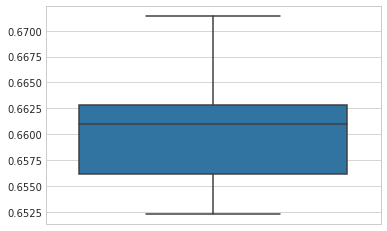

In [19]:
pca_lr_nested_cv_f1_scores = joblib.load('pca_lr_nested_cv_f1_scores.pkl')

plot_cv_scores(pca_lr_nested_cv_f1_scores)

In [18]:
rfe_lr_pipe = Pipeline([('variance', VarianceThreshold()),
                    ('scaler', StandardScaler()),
                    ('rfe', RFE(LogisticRegression(class_weight='balanced', random_state=348744), step=4)),
                    ('lr', LogisticRegression(class_weight='balanced', random_state=621473))])

param_grid = dict()
param_grid['lr__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid['rfe__n_features_to_select'] = list(range(5, 18, 5))
param_grid['rfe__estimator__C'] = [0.1, 1, 10]

inner_cv = StratifiedKFold(n_splits=10, random_state=975428)
outer_cv = StratifiedKFold(n_splits=10, random_state=248733)

gs_cv = GridSearchCV(rfe_lr_pipe, param_grid=param_grid, n_jobs=-1, scoring='f1_weighted', cv=inner_cv, verbose=10)

rfe_lr_nested_cv_f1_scores = cross_val_score(gs_cv, X, y, cv=outer_cv, verbose=10)

joblib.dump(rfe_lr_nested_cv_f1_scores, 'rfe_lr_nested_cv_f1_scores.pkl', compress=1)

print("##### Generalization F1 Score: mean =", np.mean(rfe_lr_nested_cv_f1_scores), "std =", np.std(rfe_lr_nested_cv_f1_scores))
print()

##### Generalization F1 Score: mean = 0.681933347276 std = 0.0138063133181

[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_f

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.651657836935674, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6910676657095496, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6638198729632808, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642357834399357, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6583794256863126, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6540355486754399, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6550763118902451, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6469233962963343, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6488883914690092, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.65425

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6615631645274811, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6777877677775668, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.65487323175268, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6614512976457314, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6572502343497404, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6607810

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6619732931951922, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6760152137871852, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6689162458394318, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6680879603310997, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6514155650535819, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_t

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6488883914690092, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6469233962963343, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6550763118902451, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6542247675922781, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.1s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6646086963153641, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6650089246013838, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6777877677775668, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.65487323175268, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6614512976457314, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6572502343497404, t

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6680879603310997, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6544659986283866, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6572028543557362, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6638198729632808, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6579921947543301, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6782875276905839, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10,

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.2s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6540355486754399, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6615631645274811, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6550763118902451, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6526481174732627, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6650089246013838, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6777877677775668, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   14.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6840851492621902, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6870791521739077, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6613335377737222, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6823373598808455, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6751363739813862, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6852159379383045, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6642080589355821, total=   1.7s
[CV] rfe__n_featu

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.8s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6605118013249875, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6690376887221674, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6582618086354602, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6817465330511044, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6676301848218626, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_featur

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.8s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6823373598808455, total=   2.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6896691682871496, total=   2.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6852159379383045, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6642080589355821, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.655323912910942, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.707141543749991, total=   1.7

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.5s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6690376887221674, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6676301848218626, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6817465330511044, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6602053767653817, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6643923408174071, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6605535224302927, total

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.4s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.655323912910942, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6583690129154917, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.707141543749991, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6896691682871496, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6528736560386167, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6533197978005811, tot

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.8s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6605535224302927, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6794557341596991, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6662225897735493, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.662421353332776, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6870791521739077, total=   1.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6840851492621902, to

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   30.5s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6821324970513382, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6698146029724358, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6580438097092687, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6684068494520877, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6615867702660116, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6643868797318958,

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   33.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6943567921659374, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.656691686422153, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6587628597422474, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6528736560386167, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6533087320661123, total=   2.0s
[

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   37.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6751363739813862, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6615300907406627, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6825259969117572, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6852159379383045, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6851786242547439, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=10

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   40.6s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6636034240129901, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6643868797318958, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6792485560628233, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6669990034068223, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6613335377737222, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_sele

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   44.5s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6580438097092687, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6700087487300969, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6821324970513382, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6682127332476204, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6615867702660116, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6643868797318958, total=   1.

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   48.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6608127598045087, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6571563065820768, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.661477088651671, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6601469054751791, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6645588885624678, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6700087487300969, total=   1.8s
[CV] rfe__

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.5s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6528736560386167, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6533087320661123, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6608127598045087, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6601469054751791, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6645588885624678, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.661477088651671, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   56.9s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.656691686422153, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6587628597422474, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6528736560386167, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6533087320661123, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6608127598045087, total=  

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.0min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6943567921659374, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.707141543749991, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6587628597422474, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6528736560386167, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6533087320661123, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6608127598045087, total=   1.9s
[CV] r

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6943567921659374, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.656691686422153, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6896691682871496, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6587628597422474, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6528736560386167, total=   1.6s
[C

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6896691682871496, total=   2.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6943567921659374, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.656691686422153, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6587628597422474, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6533087320661123, tota

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.656691686422153, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6587628597422474, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6533087320661123, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6528736560386167, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6608127598045087, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6601469054751791, total=   1.7

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6528736560386167, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6533087320661123, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6608127598045087, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6601469054751791, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6645588885624678, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6700087487300969, total

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6571563065820768, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6645588885624678, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6601469054751791, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.663265428560801, total=   2.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6700087487300969, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6821324970513382, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6580438097092687, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6821324970513382, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6615867702660116, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6682127332476204, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6643868797318958, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6613335377737222, total

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.6min finished


[CV] ....................... , score=0.6763840228515103, total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6644490728666342, total=   1.3s
[CV] rfe__n_features_to_select=10, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6625810424601775, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6673354708908354, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6554555051502831, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6647516230767195, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6745755744795399, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642080589355821, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator_

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.657508207531657, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6490565360062374, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.664874278260465, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6613265212066254, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6566642295662927, total=   1.5s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6522653108671004, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estima

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.654678288324331, total=   0.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642196001347807, total=   0.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6584079264808064, total=   0.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6558615571299345, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6741019446589324, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6602427151295133, total=   1.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6644490728666342, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6625810424601775, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator_

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.3s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6473809210207607, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6474832950438931, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6788625590898152, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6473583588004204, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6498883352547066, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.8s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6601534676541352, total=   1.6s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.664874278260465, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6754979767869377, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.654678288324331, total=   0.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6613265212066254, total=   2.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    9.8s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6745755744795399, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6554555051502831, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6647516230767195, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6673354708908354, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6788625590898152, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.1s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6490565360062374, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6601534676541352, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.664874278260465, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6754979767869377, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6613265212066254, total=   2.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_feature

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6798339442226191, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6772119206067694, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6764439427862997, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6617336162878702, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6843849412391354, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6639891053219636,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6613662337109089, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6591690854847762, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6518002485185268, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6609722640711505, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6638614912498799, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.67789337952

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.4s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6764439427862997, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6617336162878702, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6852159379383045, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6843849412391354, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6639891053219636, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6946710861334532, total=   1.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.9s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6778933795281116, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6561328726758366, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6638614912498799, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6662923295098282, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6594287525583866, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6655635999349576, total

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.0s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6524179247601228, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6548631708221903, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6530116510056562, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6613662337109089, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6609722640711505, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.6s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6771182970073292, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6587866608001276, total=   1.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6772119206067694, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6798339442226191, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6619230896283556, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6764439427862997, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   29.9s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6563276470946232, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6662811126242617, total=   1.6s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6592266091367115, total=   1.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.67786662834396, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6653604845564964, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   32.9s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6513257418099779, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6534002473765691, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6541831799530202, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6554555051502831, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1, score=0.6623874055597551, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=15

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   36.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6619230896283556, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6764439427862997, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6798339442226191, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6852159379383045, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6843849412391354, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6946710861334532, total=   1.

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   40.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6618772339369526, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6651132488174561, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6589780471007046, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6771182970073292, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6772119206067694, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   43.9s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6642531918894785, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6662811126242617, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6592266091367115, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6653604845564964, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6589780471007046, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6616730773363858, total=   1.

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   48.0s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6623874055597551, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6521892528321628, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6607630774459857, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6642531918894785, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.67786662834396, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6601469054751791, total=   2.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.0s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6541831799530202, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6554555051502831, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6617600594052812, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6607630774459857, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6642531918894785, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6601469054751791, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   56.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6513257418099779, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6534002473765691, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6554555051502831, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6541831799530202, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10, score=0.6623874055597551, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6617600594052812, total

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.0min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.7067060366843281, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6513257418099779, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6946710861334532, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6534002473765691, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6554555051502831, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6541831799530202, total=   1.9s
[CV] 

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6946710861334532, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6639891053219636, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6513257418099779, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.7067060366843281, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6534002473765691, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6903721291531875, total=   3.1s
[

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6946710861334532, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6513257418099779, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.7067060366843281, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6534002473765691, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6554555051502831, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6541831799530202, t

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.2min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6554555051502831, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6541831799530202, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6617600594052812, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6607630774459857, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100, score=0.6521892528321628, total=   1.4s
[CV] rfe__n_features_to_select=15,

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6554555051502831, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6541831799530202, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6601469054751791, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6617600594052812, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6607630774459857, total=   1.7s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6623874055597551, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6623874055597551, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6521892528321628, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6607630774459857, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.665760867697312, total=   2.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6617600594052812, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6642531918894785, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6642531918894785, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.665760867697312, total=   2.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6565223862735549, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.67786662834396, total=   2.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6592266091367115, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6653604845564964, total=  

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.6min finished


[CV] ....................... , score=0.6886713916051924, total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6572024416986504, total=   1.2s
[CV] rfe__n_features_to_select=10, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6630620609733281, total=   1.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6745755744795399, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.656056995773788, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6428653667951517, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6647516230767195, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6943567921659374, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator_

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6565317639391433, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6455411397288715, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6452759297030002, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6513714786289175, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6512775520400114, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6530867301804381, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__esti

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6520779463064563, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6638443824602959, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6550763118902451, total=   0.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6640345212570745, total=   0.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6556683573042227, total=   0.9s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6584079264808064, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estim

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6616300244686811, total=   1.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6740697188409098, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6630620609733281, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6572024416986504, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6745755744795399, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_t

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.2s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6489801005172652, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6910676657095496, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6943567921659374, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6428653667951517, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6452759297030002, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.8s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6672416241307707, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6652261406659947, total=   2.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6512775520400114, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6747282151008124, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6550763118902451, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    9.6s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6745755744795399, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.656056995773788, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6669480578349313, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6647516230767195, total=   2.1s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6638198729632808, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   11.8s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6565317639391433, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6513714786289175, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6747282151008124, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6512775520400114, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6528575259670326, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6638443824602959, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.4s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6603022239988517, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6810952284402527, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6745755744795399, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6617336162878702, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6823373598808455, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6949135554345535,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.8s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6610272332417928, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6669727549725459, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.655466550813088, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6573837586967898, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6557107500887489, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_feature

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.3s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6745755744795399, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6603022239988517, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6617336162878702, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6823373598808455, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6849402478858122, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6852159379383045, total=   1.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.8s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6710515769750376, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6606002422377599, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6592028377025524, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6616389575496894, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6651696297544104, total=   1.2s
[CV] rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   23.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6949135554345535, total=   3.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.650544911768396, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6469890921499525, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6521918557445567, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6502874300205107, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.2s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6656861775879586, total=   1.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6778933795281116, total=   1.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6810952284402527, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6604976039567817, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6751363739813862, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6823373598808455, tot

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   29.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6714403189310807, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6605949562835289, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6649725913387474, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6593949384507068, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6614253941306377, total=   1.1s
[CV] rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   32.6s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6513375255335715, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.647574261037326, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6527671188239541, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6520814348434044, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6594243951472814, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6593597759711377, total=   1.9

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   36.1s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6751363739813862, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6823373598808455, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6852159379383045, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6617336162878702, total=   2.1s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6849402478858122, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5,

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   39.5s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6593949384507068, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6614253941306377, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.666841220990859, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6782807305026181, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6810952284402527, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   43.3s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6680771955905446, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6566948434822383, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6605949562835289, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6714403189310807, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6651696297544104, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6595922312700992, total=   1.

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   47.5s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6573658348179486, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6564541307130267, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6608097109833269, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6680771955905446, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6566948434822383, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6781002784733379, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV] rfe_

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   51.3s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6520814348434044, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6596221444045635, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6527671188239541, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6593597759711377, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6608097109833269, total=   1.3s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6573658348179486, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   55.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6946710861334532, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6513375255335715, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6520814348434044, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6527671188239541, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   60.0s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6477711840880802, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.707141543749991, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6513375255335715, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6950184501309141, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6520814348434044, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6527671188239541, total=   1.9s
[CV] r

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6513375255335715, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6946710861334532, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6477711840880802, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6950184501309141, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6527671188239541, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, 

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6477711840880802, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.707141543749991, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6520814348434044, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6527671188239541, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6596221444045635, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.2min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6527671188239541, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6520814348434044, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6596221444045635, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6593597759711377, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6573658348179486, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=15

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6527671188239541, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6520814348434044, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6596221444045635, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6593597759711377, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6608097109833269, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6564541307130267, total

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.4min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6564541307130267, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6671575811858671, total=   2.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6573658348179486, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6781002784733379, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6680771955905446, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_featur

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6714403189310807, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6671575811858671, total=   3.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6651696297544104, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6605949562835289, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6614253941306377, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.666841220990859, total=

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.6min finished


[CV] ....................... , score=0.6830255729662923, total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6636386341502344, total=   2.1s
[CV] rfe__n_features_to_select=10, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6593721331641116, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6487416711985883, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642080589355821, total=   2.3s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6949176551965761, total=   2.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6912581686170868, total=   2.3s
[CV]  rfe__n_featu

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.6s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6570775503770913, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6523209051917646, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6631087689013547, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6563749037810024, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6598002428087385, total=   1.9s
[CV] rfe__n_fe

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6619867859039953, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6514704410108332, total=   2.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6577779698470999, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6551975811083484, total=   2.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6532712814024942, total=   2.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6647946355000138, total=   2.2s
[CV] rfe__n_features_to_select=5, rfe__estim

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6781002784733379, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6538996300906716, total=   2.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6899446884466224, total=   2.5s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6636386341502344, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6807779434457342, total=   2.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6626661672822205, to

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6574829823227062, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6912581686170868, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6949176551965761, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6642080589355821, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6487416711985883, total=   2.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6523209051917646, to

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.4s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6647946355000138, total=   2.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6777383720063851, total=   2.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.658244768523371, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6659813515502424, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6781002784733379, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6661509811093999, 

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   13.6s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6636386341502344, total=   3.4s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6807779434457342, total=   3.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6626661672822205, total=   3.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6659134253073448, total=   3.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6593721331641116, total=   3.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   16.9s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6563749037810024, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6619867859039953, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6551975811083484, total=   2.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6532712814024942, total=   3.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6577779698470999, total=   2.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.66479463550

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   18.7s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6899446884466224, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6807779434457342, total=   2.2s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6811822231008392, total=   2.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6779398406788512, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6802136617863955, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6825259969117572,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   22.3s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.662338570236595, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6624304265397192, total=   2.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6677722636879557, total=   1.5s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6560452078466348, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6616477291847932, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_feature

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   25.8s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6865339690922697, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6825259969117572, total=   3.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6851786242547439, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.7081649418228579, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6524435869863903, total=   2.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6603949551391216, total=   

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.9s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6624304265397192, total=   2.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6822950941801228, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6674359352495584, total=   2.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6680834531465166, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.661581105882042, total=   1.7s
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   33.8s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6965379490168117, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6643015852473676, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6575563575662285, total=   3.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6568223265559522, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.666090614258173, total=   3.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   37.6s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6807370333057151, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6811822231008392, total=   2.4s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6783163320020705, total=   2.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6807779434457342, total=   2.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6899446884466224, total=   2.6s
[CV] rfe__n_features_to_sele

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   42.0s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6679574037937949, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6626075548852648, total=   2.3s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.661272927220876, total=   2.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6620302255042001, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6820557990333336, total=   2.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   46.2s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6613756653231294, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6534118682478642, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6658705806375477, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1, score=0.6623210074066384, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6574104385549853, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=15

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   52.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6802136617863955, total=   3.1s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6807779434457342, total=   3.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6899446884466224, total=   3.4s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6825259969117572, total=   3.3s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6811822231008392, total=   3.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6865339690922697, total=   3.

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   56.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6631373212628502, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6643444628277795, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6687824776632284, total=   1.9s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6619008814469912, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6680834531465166, total=   2.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.681315756764279, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  1.0min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6562318688616267, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6682127332476204, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6679574037937949, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6620302255042001, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.682248382525301, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6682795585014601, total=   1.7

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6572079543255865, total=   3.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6610687207185661, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6625165654750168, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6628029562533543, total=   3.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6662867701182708, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.682248382525301, total=   2.9s
[CV]  rfe_

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6577397612479058, total=   3.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6662867701182708, total=   3.3s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6658705806375477, total=   3.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6625165654750168, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6628029562533543, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6572079543255865, total=   3.6s
[CV

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.707946635395079, total=   2.5s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6851786242547439, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6613756653231294, total=   2.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6534118682478642, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6658705806375477, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6577397612479058, total=  

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6965379490168117, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6613756653231294, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6534118682478642, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.707946635395079, total=   3.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6658705806375477, total=   2.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6577397612479058, total=   3.0s
[CV] r

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6865339690922697, total=   3.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6965379490168117, total=   3.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6851786242547439, total=   3.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.707946635395079, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6613756653231294, total=   3.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6534118682478642, total=   3.5s
[C

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.7min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6851786242547439, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6965379490168117, total=   2.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6613756653231294, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.707946635395079, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6534118682478642, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6658705806375477, tot

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.8min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.6965379490168117, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.707946635395079, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6534118682478642, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6613756653231294, total=   3.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6658705806375477, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.65799760075132, total=   3.0s
[C

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  2.0min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6658705806375477, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6577397612479058, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.65799760075132, total=   3.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6662867701182708, total=   3.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6610687207185661, total=   3.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6628029562533543, total= 

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  2.1min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6662867701182708, total=   2.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6610687207185661, total=   2.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6628029562533543, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6625165654750168, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6679574037937949, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.66821273324

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  2.2min


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6679574037937949, total=   2.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6620302255042001, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6682127332476204, total=   3.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.682248382525301, total=   3.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6633339303444621, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  2.4min finished


[CV] ....................... , score=0.6831879989054217, total= 2.4min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.2min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.655466321312781, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6570043588809868, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6657198748646951, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642080589355821, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6472275460781451, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6740622283243629, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6766892229607187, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6560600521795985, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6490204873356403, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6596028343719156, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.658870130376387, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6573387051061194, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.649568

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6560353431917668, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6523281901343214, total=   0.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.662636648196282, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6536734863242419, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6570331849085626, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.675097

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6626609965757723, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6677521754446066, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.655466321312781, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6570043588809868, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.65448681295618, total=   2.0s
[CV]  rfe__n_features_to_sele

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6800361726682586, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6525504759901689, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6472275460781451, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6560600521795985, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6495682146533615, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6573387051061194, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, l

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.2s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6622608316844032, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6737120170751972, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6523281901343214, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6536734863242419, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.662636648196282, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.2s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6570043588809868, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6677521754446066, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6657198748646951, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6642080589355821, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6673354708908354, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6472275460781451

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.3s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6573387051061194, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6490204873356403, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6596028343719156, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6506839737587727, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.658870130376387, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.656035343191

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.9s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6626609965757723, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6583292333083994, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6602928225785639, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6719739717758211, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6581344275496678, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6861575221685017

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.6s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6647868953698792, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6540946642919719, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6540471532503652, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6625048518298111, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6593331452029823, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6647447675829044, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=5, rfe__estimator__

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   19.2s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6581344275496678, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6830917432812679, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6861575221685017, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6849402478858122, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6842213804273882, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6777480114606067, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 .

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6773121153306262, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6647236887375908, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.657570340235035, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6651696297544104, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6580079357623997, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.7s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.688787483385203, total=   2.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6777480114606067, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6485649572534358, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6572689173933677, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6611752543684621, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_se

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.2s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6580079357623997, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6639230288897999, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6771182970073292, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6608967356708458, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6600879949339178, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6587187398791595, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, 

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   31.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6608238214356718, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6628973448999265, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6774927494031466, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6655026725707407, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6577447108495647, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   34.2s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6844138436613468, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6578598648956873, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6501313393775783, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6625472804806518, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.653865930840094, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6538415540970641, total=   1.8s

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   38.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6721679028264862, total=   2.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6840083264470194, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6849402478858122, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6861575221685017, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6844138436613468, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6777328130885854, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 .

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   41.4s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6577447108495647, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6653604845564964, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.658594926562159, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6614688757118147, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6641069297842004, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6781002784733379, total=

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   45.6s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6628973448999265, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6656973334441638, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6575392819906565, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6653604845564964, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6612646289681735, total=   1.1s
[CV] rfe__n_features_to_select=5, 

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   50.0s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6597261739943708, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6548788165628338, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6651346264352384, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6628973448999265, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.66399

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   54.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6625472804806518, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.653865930840094, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6643868797318958, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6606203656907801, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6597261739943708, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6534376474950544, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   58.4s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6578598648956873, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6844138436613468, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6501313393775783, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6625472804806518, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.653865930840094, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6777328130885854, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.688787483385203, total=   3.1s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6844138436613468, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6578598648956873, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6501313393775783, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6625472804806518, total=   1.8s
[CV]  r

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6578598648956873, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6777328130885854, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6501313393775783, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.688787483385203, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6625472804806518, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, r

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.688787483385203, total=   2.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6844138436613468, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6501313393775783, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6578598648956873, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6625472804806518, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.653865930840094, tot

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6501313393775783, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6578598648956873, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6625472804806518, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.653865930840094, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6643868797318958, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=15,

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6625472804806518, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.653865930840094, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6643868797318958, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6606203656907801, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6548788165628338, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6534376474950544, total=

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6643868797318958, total=   2.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6606203656907801, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6534376474950544, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.677299034611417, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6651346264352384, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6597261739943708, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator_

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6575392819906565, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6653604845564964, total=   1.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6656973334441638, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.658594926562159, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6612646289681735, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.7min finished


[CV] ....................... , score=0.6573854684823657, total= 1.7min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.9min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6806206102477218, total=   1.3s
[CV] rfe__n_features_to_select=10, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6708686190454284, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6491850722576263, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6638198729632808, total=   1.6s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6483800481154436, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6651779338893096, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6848391164316966, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6594243951472814, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.656135632980357, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6492029209684723, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6601895000355632, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642531918894785, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.660417

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.65935335810182, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.676644634756829, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6497240039177797, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6572767815915324, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6546646036464691, total=   1.0s
[CV] rfe__n_featu

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6572223005343251, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6752374074096983, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6579794015946103, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6806206102477218, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6708686190454284, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_t

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.4s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6476081770838295, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6483800481154436, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6756944208307655, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6594243951472814, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6481450304478166, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6528757904829979, 

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.9s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6604175122224908, total=   2.5s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6642531918894785, total=   1.3s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6564656166918797, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.65935335810182, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6497240039177797, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.676644634756829, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr_

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.0s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6651779338893096, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6848391164316966, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6491850722576263, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6638198729632808, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.7069550002611886, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   11.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6528757904829979, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6564656166918797, total=   1.7s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.656135632980357, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6601895000355632, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6492029209684723, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6534416021087303, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.4s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6604976039567817, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6811822231008392, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6717924798766948, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6507232056960496, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6851786242547439, total=   1.5s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6865339690922697, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.2s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6602406342806145, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6643090939527752, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6552789570653696, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6640401003701528, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6594329527109516, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.66079762039

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.5s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6717924798766948, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6507232056960496, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6837149523350452, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6865339690922697, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6851786242547439, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5,

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6613600121662574, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6784877092005626, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6676420834404003, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6541831799530202, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6608348500309513, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6587866608001276, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   23.8s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6767833878401839, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.7081649418228579, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.688787483385203, total=   2.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6525440827537026, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6509314964058743, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6631304212808959, tot

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   26.6s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6650685447259078, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6773121153306262, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6604976039567817, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6810952284402527, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6846605681790621, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6509178564458508, tot

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   30.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6676301848218626, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.67888834756916, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6549531352755483, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6624733775674055, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   33.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6513094105535964, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6767833878401839, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6641127368442273, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6535877695824024, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6619753127997055, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6592266091367115, total=   1.8

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   36.5s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6721805205840152, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6846605681790621, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6865339690922697, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6509178564458508, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6851786242547439, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5,

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   40.0s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6612264529798059, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6624733775674055, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6587809495477326, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6654456391511187, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6780870708319652, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6810952284402527, total= 

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   43.9s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6556708256037375, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6601262607974345, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6646782509339246, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6549531352755483, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6676301848218626, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6614242518992057, total=   1.

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   48.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6619753127997055, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6601262607974345, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6592266091367115, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6606272653754115, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6646270452499696, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6556708256037375, total=   1.3s
[CV] rfe_

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6645054158379331, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1, score=0.688787483385203, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6535877695824024, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6619753127997055, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6601262607974345, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6592266091367115, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] 

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   56.3s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6523389496929156, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6513094105535964, total=   1.5s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6767833878401839, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6645054158379331, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6535877695824024, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.0min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.688787483385203, total=   2.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6767833878401839, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.707946635395079, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6513094105535964, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6523389496929156, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6645054158379331, total=   1.6s
[CV] rfe

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.707946635395079, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6513094105535964, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6767833878401839, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6523389496929156, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.688787483385203, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6523389496929156, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6513094105535964, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.707946635395079, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6767833878401839, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6645054158379331, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6535877695824024, to

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.6767833878401839, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6645054158379331, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6513094105535964, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6535877695824024, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6592266091367115, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10,

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=100, score=0.688787483385203, total=   3.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6535877695824024, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6592266091367115, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6601262607974345, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6556708256037375, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6619753127997055, total= 

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.4min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6601262607974345, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6619753127997055, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6556708256037375, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6606272653754115, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6646270452499696, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_featur

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.67888834756916, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6614242518992057, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6676301848218626, total=   2.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6587809495477326, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6624733775674055, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6780870708319652, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.6min finished


[CV] ....................... , score=0.6808978091984544, total= 1.6min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 10.6min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6538996300906716, total=   1.5s
[CV]  rfe__n_features_to_select=5, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6745464299921894, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6713805487357917, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6599318556088416, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6642080589355821, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6788625590898152, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6912581686170868, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator_

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6574331462089608, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6521523721309835, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6576745953622712, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6607502944216941, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6530803902156036, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_f

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6622691856983115, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6765982281250974, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6590664207655745, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6600265466739494, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6512519218595257, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_f

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6745464299921894, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6636386341502344, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6538996300906716, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6713805487357917, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6788625590898152, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6912581686170868, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6574331462089608, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6530803902156036, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6576745953622712, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6611631209867332, total=   2.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6588390270884679, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6765982281250974, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6622691856983115, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6512519218595257, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.1s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6538996300906716, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6745464299921894, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6663920437821166, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6599318556088416, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6642080589355821, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6530803902156036, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6607502944216941, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6521523721309835, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6576745953622712, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6588390270884679, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.66226918569

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.7s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6772119206067694, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6636386341502344, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6886294806292503, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6751070092447777, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6740622283243629, total=   2.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6642080589355821,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.663901467947305, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6574140406699444, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6654537168290872, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6659030284383998, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.66196366594151, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6589187734004779, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   19.1s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6886294806292503, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6836648011562282, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6790714083898801, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6642080589355821, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6740622283243629, total=   2.5s
[CV] rfe__n_features_to_select=10,

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.6s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6805734506352161, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.663901467947305, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6689636795187427, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6659030284383998, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6626102801180737, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6556995942960813, total=

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.3s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6522737470901915, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6528973817024547, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6949176551965761, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6912581686170868, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6740622283243629, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6641200120465703, to

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.3s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6660403585413177, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6627934094432973, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6790134011048646, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6772119206067694, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6636386341502344, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6897568790368839, to

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   31.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6691445379657281, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6654274580298029, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6817316553073929, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6562831012407768, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6635976400372632, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   33.9s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6949176551965761, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6532920823525544, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6528612706791382, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6912581686170868, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6558941317469199, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6643090939527752, total=   2.1s

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   37.8s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6836648011562282, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6642080589355821, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6790714083898801, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6949176551965761, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6912581686170868, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=10

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   41.1s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6635976400372632, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6615631645274811, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6639646382459152, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6662225897735493, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6788059483279614, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6636386341502344, total= 

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   45.4s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6652318337883523, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6562831012407768, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6635976400372632, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6693382675742138, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6615631645274811, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.664159722153347, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 ......

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   49.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.663343029635161, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6580001496955385, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6652318337883523, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6593039494168156, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6644821886236941, total=   2.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6629049646314354, total=   2.0s
[CV] rfe__

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   53.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6643090939527752, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6558941317469199, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.663343029635161, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6592175741031355, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6593039494168156, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe_

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   58.3s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6912581686170868, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6528612706791382, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6532920823525544, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6558941317469199, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6643090939527752, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6592175741031355, total=

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.0min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6532920823525544, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6949176551965761, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6740622283243629, total=   2.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6912581686170868, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6528612706791382, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6643090939527752, total=   1.8s
[CV] r

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6642080589355821, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6532920823525544, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6912581686170868, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6949176551965761, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6528612706791382, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6740622283243629, total=   3.2s
[

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6912581686170868, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6532920823525544, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6528612706791382, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6643090939527752, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6592175741031355, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.6740622283243629, total=   3.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6528612706791382, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6532920823525544, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6558941317469199, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6643090939527752, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10,

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6558941317469199, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6643090939527752, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6592175741031355, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6580001496955385, total=   1.3s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6593039494168156, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.663343029635161, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6593039494168156, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6592175741031355, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6644821886236941, total=   2.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6674594220414792, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.663343029635161, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1000 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.662904964631

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6674594220414792, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6817316553073929, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6562831012407768, total=   1.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6635976400372632, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6693382675742138, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.664159722153347, total=

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.7min finished


[CV] ........................ , score=0.685603797264728, total= 1.7min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 12.2min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6517255976106547, total=   1.7s
[CV]  rfe__n_features_to_select=5, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.655311221450971, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6482157079341655, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6740622283243629, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6912581686170868, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1,

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.662081345608479, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.649104976634784, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6568786692246251, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6616495895681219, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6742862026476565, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6574663536754386, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6636386341502344, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6517255976106547, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6498780183892389, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.655311221450971, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6912581686170868, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6552708703217416, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6483345669715503, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6520873998287172, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6573011159346805, t

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.2s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6638443824602959, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6546488632446228, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6754765853650694, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.662081345608479, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6623231806465468, total=   2.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6568786692246251, 

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.4s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6574663536754386, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6612351838440708, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6498780183892389, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6788625590898152, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6716031132984157, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.5s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6546488632446228, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6520873998287172, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.662081345608479, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6754765853650694, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6638443824602959, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_feature

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.9s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.659111150035965, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6636386341502344, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6733308064136115, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6751070092447777, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6627876360918874, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6740622283243629, 

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6600097338865892, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6547477525884848, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6586054020826996, total=   1.7s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6544786760602981, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6609119052715695, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6646270452499696, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=5, rfe__estimator__

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   19.2s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6751070092447777, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6614242518992057, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6627876360918874, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6716031132984157, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6740622283243629, total=   2.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5,

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.9s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.677299034611417, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6545632091116939, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6652513172329609, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6667697748929795, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6610327979125442, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6574474514141873, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6912581686170868, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6740622283243629, total=   2.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6497383529778392, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6613839483208788, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6547477525884848, t

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.5s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6775059018260984, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6596878630856942, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6734977715488001, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6636386341502344, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6751070092447777, total=   1.6s
[CV] rfe__n_features_to_sele

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   31.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6627432438072799, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6654456391511187, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6788478671884484, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6545528488895571, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6616220142964284, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   34.4s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1, score=0.6912581686170868, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.650320450100808, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.662960201122353, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6555161004879962, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6566584415463472, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, r

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   38.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6734977715488001, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6636386341502344, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6751070092447777, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6949176551965761, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6627876360918874, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6716031132984157, total=   1.

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   41.6s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6616220142964284, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6669606735125921, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6646862270492936, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.665091222117542, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6780870708319652, total=   1.2s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6596878630856942, total=  

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   45.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1, score=0.6788478671884484, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.661819740219127, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6654456391511187, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6545528488895571, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6646862270492936, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6667575302017154, total=   1.2

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   50.1s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6595949432548791, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6552536209776034, total=   1.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6611082271489874, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6595866920760945, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6603502358066253, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6652136778565896, total=   2.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV] rfe_

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   54.3s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6578274903107418, total=   2.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6557107500887489, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.663157071344351, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6566584415463472, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6595949432548791, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6603502358066253, total=   2.0s
[CV]

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   58.5s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6578274903107418, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.650320450100808, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6912581686170868, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.663157071344351, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6557107500887489, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6566584415463472, total=  

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6949176551965761, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6740622283243629, total=   2.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=10, score=0.6912581686170868, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6578274903107418, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.650320450100808, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.663157071344351, total=   2.0s
[CV] rfe

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6912581686170868, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6578274903107418, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6740622283243629, total=   3.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.650320450100808, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.663157071344351, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6557107500887489, total=   1.7s
[

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6578274903107418, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.650320450100808, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.663157071344351, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6557107500887489, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100, score=0.6595949432548791, total=   1.3s
[CV] rfe__n_features_to_se

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.650320450100808, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6578274903107418, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.663157071344351, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6557107500887489, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6566584415463472, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6595866920760945, total=   1.9s

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.663157071344351, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6557107500887489, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6595949432548791, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6566584415463472, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6595866920760945, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6552536209776034, total=

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6595949432548791, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6566584415463472, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6595866920760945, total=   1.9s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6552536209776034, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6605469679760914, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6627432438072799, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6627432438072799, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6788478671884484, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.661819740219127, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6654456391511187, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6667575302017154, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_selec

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.7min finished


[CV] ....................... , score=0.6614724925299904, total= 1.7min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 13.9min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6644490728666342, total=   1.4s
[CV] rfe__n_features_to_select=10, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6637232223593945, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6745464299921894, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6700578414554631, total=   1.7s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6622057217795629, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6612107622098621, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6503698680159822, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimato

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.661819740219127, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6588128350392051, total=   1.7s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6553200994590613, total=   1.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6465081631946097, total=   1.6s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6611568164235929, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6510610

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6492895103789318, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6614930326802038, total=   2.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6510457115700892, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6518703601835115, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6756928775888269, total=   1.8s
[CV] rfe__n_fe

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6504180278945311, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.676038301596111, total=   1.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6644490728666342, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6637232223593945, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6745464299921894, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6612107622098621, total=   2.0s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6912581686170868, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6503698680159822, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6588128350392051, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6492895103789318, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.4s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6756928775888269, total=   1.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6506560498346966, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6578714850932029, total=   0.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6610368219873727, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6504180278945311, total=   0.9s
[CV] rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   10.3s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.671187616787038, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.661819740219127, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6622057217795629, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6503698680159822, total=   1.6s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6700578414554631, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.4s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.651061054496186, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6553200994590613, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6518703601835115, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6611568164235929, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6602445065659494, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.675692877588

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.9s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6772119206067694, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6811735365790946, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6899446884466224, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6655377679046827, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6747039162041388, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6782003802117017,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.6s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6536756158505486, total=   1.6s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6611795943282281, total=   1.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6656973334441638, total=   2.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6563749037810024, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6657274760403256, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6648404813103073, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   19.1s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6899446884466224, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6747039162041388, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6655377679046827, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6782003802117017, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6880386995252443, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6823373598808455, total=   1.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.7s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6783200899465078, total=   1.9s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6648404813103073, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6656973334441638, total=   2.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6676058998130832, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6547263781236021, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6643572242968057, total

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.7s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6543948660073039, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6642939177525898, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6882730570813803, total=   3.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6532627881561057, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6657274760403256, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.653098300845611, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6589721004373519, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6776864324633676, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6772119206067694, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6811735365790946, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_se

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   30.9s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6543559496930158, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.67888834756916, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6553104137516428, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6679940027555518, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6616127297106301, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   34.1s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6547871220356264, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.66488232912623, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6532508808921423, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6655239087920771, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6538723206875128, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1, score=0.6611795943282281, total=   1.3s

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   37.4s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6772119206067694, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6904803310088997, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6761974376240428, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6655377679046827, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6787664623080261, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6823373598808455, total=   1.

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   41.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.664154015415711, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6538906303408704, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6595566124869864, total=   1.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6780464894396983, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1, score=0.6772119206067694, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1 ....
[CV]  rfe__n_features_to_select=

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   45.4s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6553328763804995, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6553104137516428, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6616127297106301, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6679940027555518, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6645475929852122, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   49.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6611795943282281, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6657203931684449, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6553328763804995, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.654552700787929, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6654183855141044, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1 ......
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6567749329966238, total=   2.0s
[CV] rfe__

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   53.6s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1, score=0.6882730570813803, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6650783962192063, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6532508808921423, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6538723206875128, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6611795943282281, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6654183855141044, total=   1.3s
[CV]

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   58.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.7077282632220966, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6823373598808455, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.652314488204433, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6547871220356264, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6650783962192063, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6538723206875128, total=  

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.1min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6547871220356264, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6650783962192063, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6532508808921423, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6538723206875128, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6657203931684449, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10, score=0.6611795943282281, total=   1.3s
[CV

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6787664623080261, total=   2.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.7077282632220966, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.652314488204433, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6882730570813803, total=   3.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6823373598808455, total=   2.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6650783962192063, total=   1.8s
[C

[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6882730570813803, total=   2.5s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6823373598808455, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.7077282632220966, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.652314488204433, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6547871220356264, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6650783962192063, tot

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.7077282632220966, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6650783962192063, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6532508808921423, total=   2.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6538723206875128, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6657203931684449, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100, score=0.6611795943282281, total=   1.3

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6650783962192063, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6532508808921423, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6538723206875128, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6657203931684449, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6611795943282281, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_sele

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6538723206875128, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6657203931684449, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6662811126242617, total=   2.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6553328763804995, total=   1.5s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.654552700787929, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6654183855141044, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6662811126242617, total=   2.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6567749329966238, total=   2.1s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6790820238263972, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.654552700787929, total=   2.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6553104137516428, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6679940027555518, total=

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.7min finished


[CV] ....................... , score=0.6970404869697575, total= 1.7min
[CV]  ................................................................
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.6min remaining:    0.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001 .
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6637232223593945, total=   1.5s
[CV]  rfe__n_features_to_select=5, rf

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6612351838440708, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6781818378547461, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.648082442654911, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6618994697618079, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6742546122872529, total=   2.1s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.001, score=0.6700578414554631, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator_

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6546890673824044, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6512775520400114, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6588128350392051, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.656671945631466, total=   1.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001 
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.651872951278033, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6562486

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.665194880711357, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.657568940346207, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.001, score=0.6552469897130807, total=   1.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6506472425739152, total=   0.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.664402794404274, total=   0.9s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.65926508198077, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator_

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6550247102930479, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6574245383953572, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.001, score=0.6634936648747651, total=   1.1s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6637232223593945, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6745464299921894, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.66444907286663

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.4s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.001, score=0.6781818378547461, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.648082442654911, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6546890673824044, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6588128350392051, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6512775520400114, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.1s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.657568940346207, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6562486368949082, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.001, score=0.6552469897130807, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.665194880711357, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.001, score=0.6506472425739152, total=   0.9s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    9.9s


[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6745464299921894, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6600463355639425, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.671187616787038, total=   2.0s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6612351838440708, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6700578414554631, total=   1.8s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.001, score=0.6618994697618079, 

[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   12.2s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.6597660741537248, total=   1.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001, score=0.651872951278033, total=   1.2s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.001 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6562486368949082, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.657568940346207, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6644978322831909, total=   2.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.001, score=0.6552469897130

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   13.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6811735365790946, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6772119206067694, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6899446884466224, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6752641924394598, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6655377679046827, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.01, score=0.6787664623080261,

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.6s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6599751667215972, total=   1.7s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.657626734062236, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.663265428560801, total=   1.2s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6616477291847932, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.01, score=0.6561330322101444, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.01, score=0.6597401133154

[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.9s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6772119206067694, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6655377679046827, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6752641924394598, total=   1.9s
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6787664623080261, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6872865449612265, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.01, score=0.6618994697618079, total=   1.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.4s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.6683266580526495, total=   2.6s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.663265428560801, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6568779092130307, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.01, score=0.665760867697312, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.01, score=0.6675935130121928, total=   1.7s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01 ...
[CV] rfe__n_features_to_select=

[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   24.5s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6953507885419679, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6595715336395805, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6515870026570459, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6618994697618079, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.01, score=0.6882730570813803, total=   3.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.01, score=0.6624972230541105, total=   1.5s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.0s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6679263281287541, total=   1.1s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6619084438499344, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.01, score=0.6563290164849048, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1 ...
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6772119206067694, total=   1.6s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=0.1, score=0.6811735365790946, total=   1.5s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1 ..
[CV]  rfe__n_features_to_s

[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   30.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6620302255042001, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6663459866034039, total=   1.8s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6634353919821048, total=   1.4s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6562715479159312, total=   1.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=0.1, score=0.6601333022312782, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=0.1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=0.1, score=0.6679814679356908,

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   33.8s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6597593084515501, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6632817671160866, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6521750041328541, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6582199503456465, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6568545091507689, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=0.1 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=0.1, score=0.6603691943387029, total=   2.

[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   37.6s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6904803310088997, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6761974376240428, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6657274760403256, total=   1.9s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6787664623080261, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6872865449612265, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=0.1 ...
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=0.1, score=0.6618994697618079, total=   1.

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   41.1s


[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6679814679356908, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6620078429464652, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6667511736477254, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6575072519947264, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6624972230541105, total=   1.5s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=0.1, score=0.6691058753796736, total=   1.3s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__

[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   45.4s


[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6564659032770653, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6679814679356908, total=   1.6s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6620078429464652, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6577110736989119, total=   1.1s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=1 .......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6624972230541105, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1, score=0.6669479679906847, total=   1.

[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   49.6s


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6582199503456465, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6561240895495702, total=   1.4s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6617756940705326, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6603691943387029, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1 ......
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1, score=0.6634353919821048, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.6620302255042001, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1, score=0.660133

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   53.6s


[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6634778150780796, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6570487597574074, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6582199503456465, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1, score=0.6617756940705326, total=   1.4s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=1, score=0.6603691943387029, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=1 .....
[CV]  rfe__n_features_to_select=15, rfe

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   58.0s


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=10, score=0.6953507885419679, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6599551734338908, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6521750041328541, total=   2.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6634778150780796, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6570487597574074, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=10 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=10, score=0.6582199503456465, total=

[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.1min


[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6634778150780796, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6570487597574074, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=10, score=0.6582199503456465, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10, score=0.6617756940705326, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10, score=0.6561240895495702, total=   1.3s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=10 .....
[CV]  rfe__n_features_to_select=10, rfe

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6872865449612265, total=   1.8s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6618994697618079, total=   1.7s
[CV] rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=10, score=0.6953507885419679, total=   1.7s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6521750041328541, total=   1.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6599551734338908, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=10, score=0.6634778150780796, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=10 ....


[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.2min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6618994697618079, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=0.1, lr__C=100, score=0.6953507885419679, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6599551734338908, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6521750041328541, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6634778150780796, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=100 ..
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=100, score=0.6582199503456465, t

[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.3min


[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.6953507885419679, total=   2.0s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=5, rfe__estimator__C=1, lr__C=100, score=0.6882730570813803, total=   2.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6599551734338908, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6521750041328541, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6634778150780796, total=   1.6s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=100 ....
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=100, score=0.6570487597574074, total=   1.7s

[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.4min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6634778150780796, total=   1.9s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6603691943387029, total=   1.9s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6582199503456465, total=   2.0s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=10, lr__C=100, score=0.6570487597574074, total=   2.1s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV] rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6634353919821048, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__C=100, score=0.6561240895495702, total=   1.5s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=10, lr__

[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.5min


[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6582199503456465, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6561240895495702, total=   1.3s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000, score=0.6617756940705326, total=   1.4s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6683159912077254, total=   2.8s
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6663459866034039, total=   1.8s
[CV] rfe__n_features_to_select=15, rfe__estimator__C=0.1, lr__C=1000 .
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=0.1, lr__C=1000, score=0.6603691943387029, total=   2.0s
[CV] rfe__n_features_to_select=5, rfe__estimator__

[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.6min


[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=10, rfe__estimator__C=1, lr__C=1000, score=0.6683159912077254, total=   2.8s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6564659032770653, total=   1.2s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6669479679906847, total=   1.3s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=1000 ...
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6679814679356908, total=   2.0s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6624972230541105, total=   1.2s
[CV]  rfe__n_features_to_select=15, rfe__estimator__C=1, lr__C=1000, score=0.6620078429464652, total=   1.5s
[CV] rfe__n_features_to_select=5, rfe__estimator__C=10, lr__C=

[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.7min finished


[CV] ....................... , score=0.7056644319875216, total= 1.7min
##### Generalization F1 Score: mean = 0.681933347276 std = 0.0138063133181



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 17.3min finished


[ 0.67638402  0.68867139  0.68302557  0.683188    0.65738547  0.68089781
  0.6856038   0.66147249  0.69704049  0.70566443]



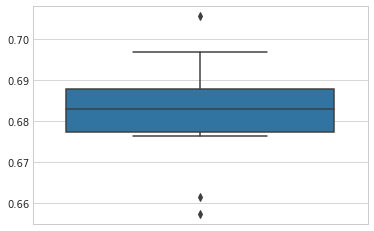

In [20]:
rfe_lr_nested_cv_f1_scores = joblib.load('rfe_lr_nested_cv_f1_scores.pkl')

plot_cv_scores(rfe_lr_nested_cv_f1_scores)